In [1]:
# username : ra22242
# name : Ahangama Withanage Roshan Darshana Madhushanka
# email : ra22242@essex.ac.uk
# project : Assignment 2 (University trial)
# *** Important - references can be found in bottom of this notebook ***
# *** Important - use google colab to run this notebook ***

# Step 01 - Loading Data

In [2]:
# downloading dataset from given github link
!git clone https://github.com/italha-d/Stress-Predict-Dataset.git

Cloning into 'Stress-Predict-Dataset'...
remote: Enumerating objects: 417, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 417 (delta 45), reused 83 (delta 35), pack-reused 314
Receiving objects: 100% (417/417), 26.28 MiB | 7.48 MiB/s, done.
Resolving deltas: 100% (89/89), done.
Updating files: 100% (288/288), done.


In [3]:
# removing readme file ( otherwise it will break the process of listing dir with os.listdir )
!rm /content/Stress-Predict-Dataset/Raw_data/Readme

In [54]:
# importing libraries 
import os
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import multiprocessing
import time
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from scipy.signal import butter, filtfilt, find_peaks

In [5]:
# making variable for data paths
DATA_PATH = "/content/Stress-Predict-Dataset/Raw_data"
SAVE_PATH = "/content/save"
# create dir for saving data as csv files
os.mkdir(SAVE_PATH)

In [6]:
# creating new dataframe obj for main four signals
acc = pd.DataFrame(columns=['id', 'X', 'Y', 'Z', 'datetime'])
bvp = pd.DataFrame(columns=['id', 'BVP', 'datetime'])
eda = pd.DataFrame(columns=['id', 'EDA', 'datetime'])
hr = pd.DataFrame(columns=['id', 'HR', 'datetime'])
temp = pd.DataFrame(columns=['id', 'TEMP', 'datetime'])

In [7]:
# fucntions for creating new dataframe with id and timestamp
def process_df(df, file):
    start_timestamp = df.iloc[0, 0]
    sample_rate = df.iloc[1, 0]
    new_df = pd.DataFrame(df.iloc[2:].values, columns=df.columns)
    new_df['id'] = file[-2:]
    new_df['datetime'] = [(start_timestamp + i / sample_rate) for i in range(len(new_df))]
    return new_df

In [8]:
names = {
    'ACC.csv': ['X', 'Y', 'Z'],
    'BVP.csv': ['BVP'],
    'EDA.csv': ['EDA'],
    'HR.csv': ['HR'],
    'TEMP.csv': ['TEMP'],
}
# main signals filenames that requesting from wearable sensors
desired_signals = ['ACC.csv', 'BVP.csv', 'EDA.csv', 'HR.csv', 'TEMP.csv']

# looping though raw data folder and load data to previously created dataframes ( ex :- acc, eda, hr, temp)
for file in os.listdir(DATA_PATH):
    print(os.listdir(DATA_PATH))
    print(f'Processing {file}')
    for signal in os.listdir(os.path.join(DATA_PATH, file)):
        if signal in desired_signals:
            df = pd.read_csv(os.path.join(DATA_PATH, file, signal), names=names[signal], header=None)
            if not df.empty:
                if signal == 'ACC.csv':
                    acc = pd.concat([acc, process_df(df, file)])
                if signal == 'BVP.csv':
                    print(f'BVP Processing {file}')
                    bvp = pd.concat([bvp, process_df(df, file)])
                if signal == 'EDA.csv':
                    eda = pd.concat([eda, process_df(df, file)])
                if signal == 'HR.csv':
                    hr = pd.concat([hr, process_df(df, file)])
                if signal == 'TEMP.csv':
                    temp = pd.concat([temp, process_df(df, file)])
                    
                    

['S02', 'S15', 'S26', 'S11', 'S19', 'S34', 'S16', 'S01', 'S18', 'S25', 'S29', 'S22', 'S23', 'S24', 'S08', 'S14', 'S21', 'S31', 'S27', 'S04', 'S06', 'S12', 'S10', 'S35', 'S07', 'S13', 'S30', 'S17', 'S28', 'S05', 'S20', 'S03', 'S33', 'S09', 'S32']
Processing S02
BVP Processing S02
['S02', 'S15', 'S26', 'S11', 'S19', 'S34', 'S16', 'S01', 'S18', 'S25', 'S29', 'S22', 'S23', 'S24', 'S08', 'S14', 'S21', 'S31', 'S27', 'S04', 'S06', 'S12', 'S10', 'S35', 'S07', 'S13', 'S30', 'S17', 'S28', 'S05', 'S20', 'S03', 'S33', 'S09', 'S32']
Processing S15
BVP Processing S15
['S02', 'S15', 'S26', 'S11', 'S19', 'S34', 'S16', 'S01', 'S18', 'S25', 'S29', 'S22', 'S23', 'S24', 'S08', 'S14', 'S21', 'S31', 'S27', 'S04', 'S06', 'S12', 'S10', 'S35', 'S07', 'S13', 'S30', 'S17', 'S28', 'S05', 'S20', 'S03', 'S33', 'S09', 'S32']
Processing S26
BVP Processing S26
['S02', 'S15', 'S26', 'S11', 'S19', 'S34', 'S16', 'S01', 'S18', 'S25', 'S29', 'S22', 'S23', 'S24', 'S08', 'S14', 'S21', 'S31', 'S27', 'S04', 'S06', 'S12', 'S10'

In [9]:
# save combined data to csv files 
print('Saving Data ...')
acc.to_csv(os.path.join(SAVE_PATH, 'combined_acc.csv'), index=False)
bvp.to_csv(os.path.join(SAVE_PATH, 'combined_bvp.csv'), index=False)
eda.to_csv(os.path.join(SAVE_PATH, 'combined_eda.csv'), index=False)
hr.to_csv(os.path.join(SAVE_PATH, 'combined_hr.csv'), index=False)
temp.to_csv(os.path.join(SAVE_PATH, 'combined_temp.csv'), index=False)
print('Saving Completed!')

Saving Data ...
Saving Completed!


In [10]:
# find all ids from participants
ids = bvp['id'].unique()

# columns for after merging process 
columns = ['X', 'Y', 'Z', 'EDA','BVP', 'HR', 'TEMP', 'id', 'datetime']

In [11]:
# function merging data using pandas merge - https://pandas.pydata.org/docs/reference/api/pandas.merge.html
# will get null values after merging data using datetime as key
# padas DataFrame.fillna used for filling null values (ex : ffill, bfill) - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html 

def merge_parallel_without_null(id):
    print(f"Processing {id}")
    df = pd.DataFrame(columns=columns)

    acc_id = acc[acc['id'] == id]
    print('acc id', acc_id)
    eda_id = eda[eda['id'] == id].drop(['id'], axis=1)
    bvp_id = bvp[bvp['id'] == id].drop(['id'], axis=1)
    hr_id = hr[hr['id'] == id].drop(['id'], axis=1)
    temp_id = temp[temp['id'] == id].drop(['id'], axis=1)

    df = acc_id.merge(eda_id, on='datetime', how='outer')
    df = df.merge(bvp_id, on='datetime', how='outer')
    df = df.merge(temp_id, on='datetime', how='outer')
    df = df.merge(hr_id, on='datetime', how='outer')

    df.fillna(method='ffill', inplace=True)
    df.fillna(method='bfill', inplace=True)

    return df

In [12]:
# function merging data using pandas merge - https://pandas.pydata.org/docs/reference/api/pandas.merge.html
# will get null values after merging data using datetime as key
# this fuction will not fill any null values so will have remove null values later

def merge_parallel_with_null(id):
    print(f"Processing {id}")
    df = pd.DataFrame(columns=columns)

    acc_id = acc[acc['id'] == id]
    print('acc id', acc_id)
    eda_id = eda[eda['id'] == id].drop(['id'], axis=1)
    bvp_id = bvp[bvp['id'] == id].drop(['id'], axis=1)
    hr_id = hr[hr['id'] == id].drop(['id'], axis=1)
    temp_id = temp[temp['id'] == id].drop(['id'], axis=1)

    df = acc_id.merge(eda_id, on='datetime', how='outer')
    df = df.merge(bvp_id, on='datetime', how='outer')
    df = df.merge(temp_id, on='datetime', how='outer')
    df = df.merge(hr_id, on='datetime', how='outer')

    return df

In [13]:
# variables for store data after merging process ( with null and without null )
# merging with bvp variable takes too much time.. process won't finish. ignore it for now
result_without_null = []
result_with_null = []

print("Merging data ...")
for i in ids:
    result_without_null.append(merge_parallel_without_null(i))
    result_with_null.append(merge_parallel_with_null(i))
print("Merging Completed!")

Merging data ...
Processing 02
acc id         id     X     Y     Z      datetime
0       02   2.0  10.0  63.0  1.644228e+09
1       02   4.0  12.0  66.0  1.644228e+09
2       02  -1.0  13.0  63.0  1.644228e+09
3       02  -7.0  11.0  59.0  1.644228e+09
4       02  -7.0   6.0  57.0  1.644228e+09
...     ..   ...   ...   ...           ...
114049  02  22.0   2.0  55.0  1.644231e+09
114050  02  23.0   0.0  58.0  1.644231e+09
114051  02  23.0  -2.0  63.0  1.644231e+09
114052  02  22.0   0.0  64.0  1.644231e+09
114053  02  21.0  -2.0  63.0  1.644231e+09

[114054 rows x 5 columns]
Processing 02
acc id         id     X     Y     Z      datetime
0       02   2.0  10.0  63.0  1.644228e+09
1       02   4.0  12.0  66.0  1.644228e+09
2       02  -1.0  13.0  63.0  1.644228e+09
3       02  -7.0  11.0  59.0  1.644228e+09
4       02  -7.0   6.0  57.0  1.644228e+09
...     ..   ...   ...   ...           ...
114049  02  22.0   2.0  55.0  1.644231e+09
114050  02  23.0   0.0  58.0  1.644231e+09
114051  02 

In [14]:
# creating dataframe with merging values
new_df_without_null = pd.concat(result_without_null, ignore_index=True)
new_df_with_null = pd.concat(result_with_null, ignore_index=True)

# save merged dataframe to csv for later usage
print("Saving merged data ...")
new_df_without_null.to_csv(os.path.join("save/merged_data_without_null.csv"), index=False)
new_df_with_null.to_csv(os.path.join("save/merged_data_with_null.csv"), index=False)
print("Saving merged data Completed!")

Saving merged data ...
Saving merged data Completed!


In [17]:
# copy created csv files into google drive asap
from google.colab import drive
drive.mount('/content/drive')
!cp /content/save/combined_acc.csv /content/drive/MyDrive/save
!cp /content/save/combined_bvp.csv /content/drive/MyDrive/save
!cp /content/save/combined_eda.csv /content/drive/MyDrive/save
!cp /content/save/combined_hr.csv /content/drive/MyDrive/save
!cp /content/save/combined_temp.csv /content/drive/MyDrive/save
!cp /content/save/merged_data_with_null.csv /content/drive/MyDrive/save
!cp /content/save/merged_data_without_null.csv /content/drive/MyDrive/save
print('csv files copied')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
csv files copied


In [18]:
# check weather if any null values in dataframe
new_df_without_null.isna().sum()

id          0
X           0
Y           0
Z           0
datetime    0
EDA         0
BVP         0
TEMP        0
HR          0
dtype: int64

In [19]:
# check weather if any null values in dataframe
new_df_with_null.isna().sum()

id          3714615
X           3714615
Y           3714615
Z           3714615
datetime          0
EDA         6964275
BVP             353
TEMP        6964343
HR          7312823
dtype: int64

In [20]:
# for viewing basic information about dataframe ( ex: num of rows )
new_df_without_null.info

<bound method DataFrame.info of          id     X     Y     Z      datetime       EDA     BVP   TEMP      HR
0        02   2.0  10.0  63.0  1.644228e+09  0.000000   -0.00  34.79  118.00
1        02   4.0  12.0  66.0  1.644228e+09  0.000000   -0.00  34.79  118.00
2        02  -1.0  13.0  63.0  1.644228e+09  0.000000   -0.00  34.79  118.00
3        02  -7.0  11.0  59.0  1.644228e+09  0.000000   -0.00  34.79  118.00
4        02  -7.0   6.0  57.0  1.644228e+09  0.000000   -0.00  34.79  118.00
...      ..   ...   ...   ...           ...       ...     ...    ...     ...
7428538  32 -31.0 -19.0  53.0  1.646671e+09  0.271642   66.11  30.61   50.42
7428539  32 -31.0 -19.0  53.0  1.646671e+09  0.271642  191.17  30.61   50.42
7428540  32 -31.0 -19.0  53.0  1.646671e+09  0.271642  282.47  30.61   50.42
7428541  32 -31.0 -19.0  53.0  1.646671e+09  0.271642  327.63  30.61   50.42
7428542  32 -31.0 -19.0  53.0  1.646671e+09  0.271642  333.63  30.61   50.42

[7428543 rows x 9 columns]>

In [21]:
# for viewing basic information about dataframe ( ex: num of rows )
new_df_with_null.info

<bound method DataFrame.info of           id    X     Y     Z      datetime  EDA     BVP   TEMP  HR
0         02  2.0  10.0  63.0  1.644228e+09  0.0   -0.00  34.79 NaN
1         02  4.0  12.0  66.0  1.644228e+09  NaN   -0.00    NaN NaN
2         02 -1.0  13.0  63.0  1.644228e+09  NaN   -0.00    NaN NaN
3         02 -7.0  11.0  59.0  1.644228e+09  NaN   -0.00    NaN NaN
4         02 -7.0   6.0  57.0  1.644228e+09  NaN   -0.00    NaN NaN
...      ...  ...   ...   ...           ...  ...     ...    ...  ..
7428538  NaN  NaN   NaN   NaN  1.646671e+09  NaN   66.11    NaN NaN
7428539  NaN  NaN   NaN   NaN  1.646671e+09  NaN  191.17    NaN NaN
7428540  NaN  NaN   NaN   NaN  1.646671e+09  NaN  282.47    NaN NaN
7428541  NaN  NaN   NaN   NaN  1.646671e+09  NaN  327.63    NaN NaN
7428542  NaN  NaN   NaN   NaN  1.646671e+09  NaN  333.63    NaN NaN

[7428543 rows x 9 columns]>

In [22]:
# dictionary for saving timestamp particular participants 
data = {}

# looping though folders for record timestamp for particular participants 
for file in os.listdir(DATA_PATH):
    for signal in os.listdir(os.path.join(DATA_PATH, file)):
        if 'tags_' in signal:
            test_df = pd.read_csv(os.path.join(DATA_PATH, file, signal), header=None)
            
            temp_data = []
            for index, row in test_df.iterrows():
                temp_data.append(int(row))
            data[signal[6:8]]=  temp_data

In [23]:
# just a view a timestamp for participant number 02
data['02']

[1644228196,
 1644228572,
 1644228844,
 1644229499,
 1644229801,
 1644229931,
 1644230238,
 1644230562,
 1644231123]

In [25]:
# find labes for merged dataframe from given tag files ( ex: tags_02.csv )
print('This process will take time. Please wait! here listen some music ', 'https://www.youtube.com/watch?v=VCamMhh9pMA')
start_time = time.time()

# variables for holding lables
y_without_null = []

# looping dataframe row by row ( dataframe without null values)
for index, row in tqdm(new_df_without_null.iterrows(), total=new_df_without_null.shape[0]):
    # just coping data dictionary ( not referenceing it )  
    temp_list = data[row['id']].copy()

    # here logic is simple 
    # first add timestamp to tags list
    temp_list.append(row['datetime'])
    # then we sort it
    temp_list.sort()

    # if added timestamp's index is 0, participant is not in stress 
    if temp_list.index(row['datetime']) == 0:
        y_without_null.append(0)
    # if added timestamp's index is more than 6, it means participant do task again. so he face same question and task that
    # he did before, I assume he will no stress by answering same question again. because he already knew the answer
    elif temp_list.index(row['datetime']) > 5:
        y_without_null.append(0)
    # if added timestamp's index is even number, witch meas participant press button twice. so participant no in stressed 
    elif temp_list.index(row['datetime']) % 2 == 0:
        y_without_null.append(0)
    # if added timestamp's index is even number, participant is not in stress
    else:
        y_without_null.append(1)
    temp_list = []
            
end_time = time.time()

print("Time taken for labelling (in seconds) : ", end_time - start_time )
        
new_df_without_null['y'] = y_without_null
new_df_without_null.to_csv(os.path.join("save/merged_data_without_null_with_lables.csv"), index=False)    

saving_time = time.time()

print("Time taken for saving data to csv (in seconds) : ", saving_time - end_time )


This process will take time. Please wait! here listen some music  https://www.youtube.com/watch?v=VCamMhh9pMA


  0%|          | 0/7428543 [00:00<?, ?it/s]

Time taken for labelling (in seconds) :  406.920040845871
Time taken for saving data to csv (in seconds) :  38.8808650970459


In [26]:
# copy created csv files into google drive asap
from google.colab import drive
drive.mount('/content/drive')
!cp /content/save/merged_data_without_null_with_lables.csv /content/drive/MyDrive/save
print('Data has been copy to google drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data has been copy to google drive


In [27]:
# find labes for merged dataframe from given tag files ( ex: tags_02.csv )
print("This won't will take much time! anyway here listen some music ", 'https://songsara.net/58262/')
start_time = time.time()

# variables for holding lables
y_with_null = []

# removing null raws
new_df_with_null = new_df_with_null.dropna(how='any',axis=0)
print(new_df_with_null.info())

# looping dataframe row by row ( dataframe without null values)
for index, row in tqdm(new_df_with_null.iterrows(), total=new_df_with_null.shape[0]):
    # just coping data dictionary ( not referenceing it )  
    temp_list = data[row['id']].copy()

    # here logic is simple 
    # first add timestamp to tags list
    temp_list.append(row['datetime'])
    # then we sort it
    temp_list.sort()
    # if added timestamp's index is 0, participant is not in stress 
    if temp_list.index(row['datetime']) == 0:
        y_with_null.append(0)
    # if added timestamp's index is more than 6, it means participant do task again. so he face same question and task that
    # he did before, I assume he will no stress by answering same question again. because he already knew the answer
    # if added timestamp's index is even number, witch meas participant press button twice. so participant no in stressed ( he is in interval time)
    elif temp_list.index(row['datetime']) % 2 == 0 or temp_list.index(row['datetime']) > 5:
        y_with_null.append(0)
    # if added timestamp's index is even number, participant is not in stress
    else:
        y_with_null.append(1)
    temp_list = []
            
end_time = time.time()

print("Time taken for labelling (in seconds) : ", end_time - start_time )
        
new_df_with_null['y'] = y_with_null
new_df_with_null.to_csv(os.path.join("save/merged_data_with_null_with_lables.csv"), index=False)    

saving_time = time.time()

print("Time taken for saving data to csv (in seconds) : ", saving_time - end_time )

This won't will take much time! anyway here listen some music  https://songsara.net/58262/
<class 'pandas.core.frame.DataFrame'>
Int64Index: 115670 entries, 320 to 7325854
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        115670 non-null  object 
 1   X         115670 non-null  float64
 2   Y         115670 non-null  float64
 3   Z         115670 non-null  float64
 4   datetime  115670 non-null  float64
 5   EDA       115670 non-null  float64
 6   BVP       115670 non-null  float64
 7   TEMP      115670 non-null  float64
 8   HR        115670 non-null  float64
dtypes: float64(8), object(1)
memory usage: 8.8+ MB
None


  0%|          | 0/115670 [00:00<?, ?it/s]

Time taken for labelling (in seconds) :  10.0201997756958


<ipython-input-27-e413731b7a7e>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_with_null['y'] = y_with_null


Time taken for saving data to csv (in seconds) :  0.5642874240875244


In [43]:
# Import the drive module from the google.colab library
from google.colab import drive

# Define a function that takes a method and filename as parameters
def connect_with_google_drive(method, filename):
  
  # If the method is 'save'
  if method == 'save':
    
    # Mount the Google Drive
    drive.mount('/content/drive')
    
    # Copy the file from the /content/save directory to the /content/drive/MyDrive/save directory in Google Drive
    !cp /content/save/{filename} /content/drive/MyDrive/save
    
    # Print a message indicating that the data has been copied to Google Drive
    print('Data has been copy to google drive')
    
  # If the method is 'load'
  elif method == 'load':
    
    # Mount the Google Drive
    drive.mount('/content/drive')
    
    # Copy the file from the /content/drive/MyDrive/save directory in Google Drive to the /content/save directory
    !cp /content/drive/MyDrive/save/{filename} /content/save/
    
    # Print a message indicating that the data has been copied from Google Drive
    print('Data has been copy from google drive')
  else:
    print('Wrong method. please use save or load')


In [42]:
# copy created csv files into google drive asap
connect_with_google_drive('save', 'merged_data_with_null_with_lables.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data has been copy to google drive


# Step 02 - Find relations between signals and stress ( by visualising ex- line chart )


In [45]:
# copy files from google drive
connect_with_google_drive('load', 'merged_data_without_null_with_lables.csv')
# load created data from first step
df = pd.read_csv('save/merged_data_without_null_with_lables.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data has been copy from google drive


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7428543 entries, 0 to 7428542
Data columns (total 10 columns):
 #   Column    Dtype  
---  ------    -----  
 0   id        int64  
 1   X         float64
 2   Y         float64
 3   Z         float64
 4   datetime  float64
 5   EDA       float64
 6   BVP       float64
 7   TEMP      float64
 8   HR        float64
 9   y         int64  
dtypes: float64(8), int64(2)
memory usage: 566.8 MB


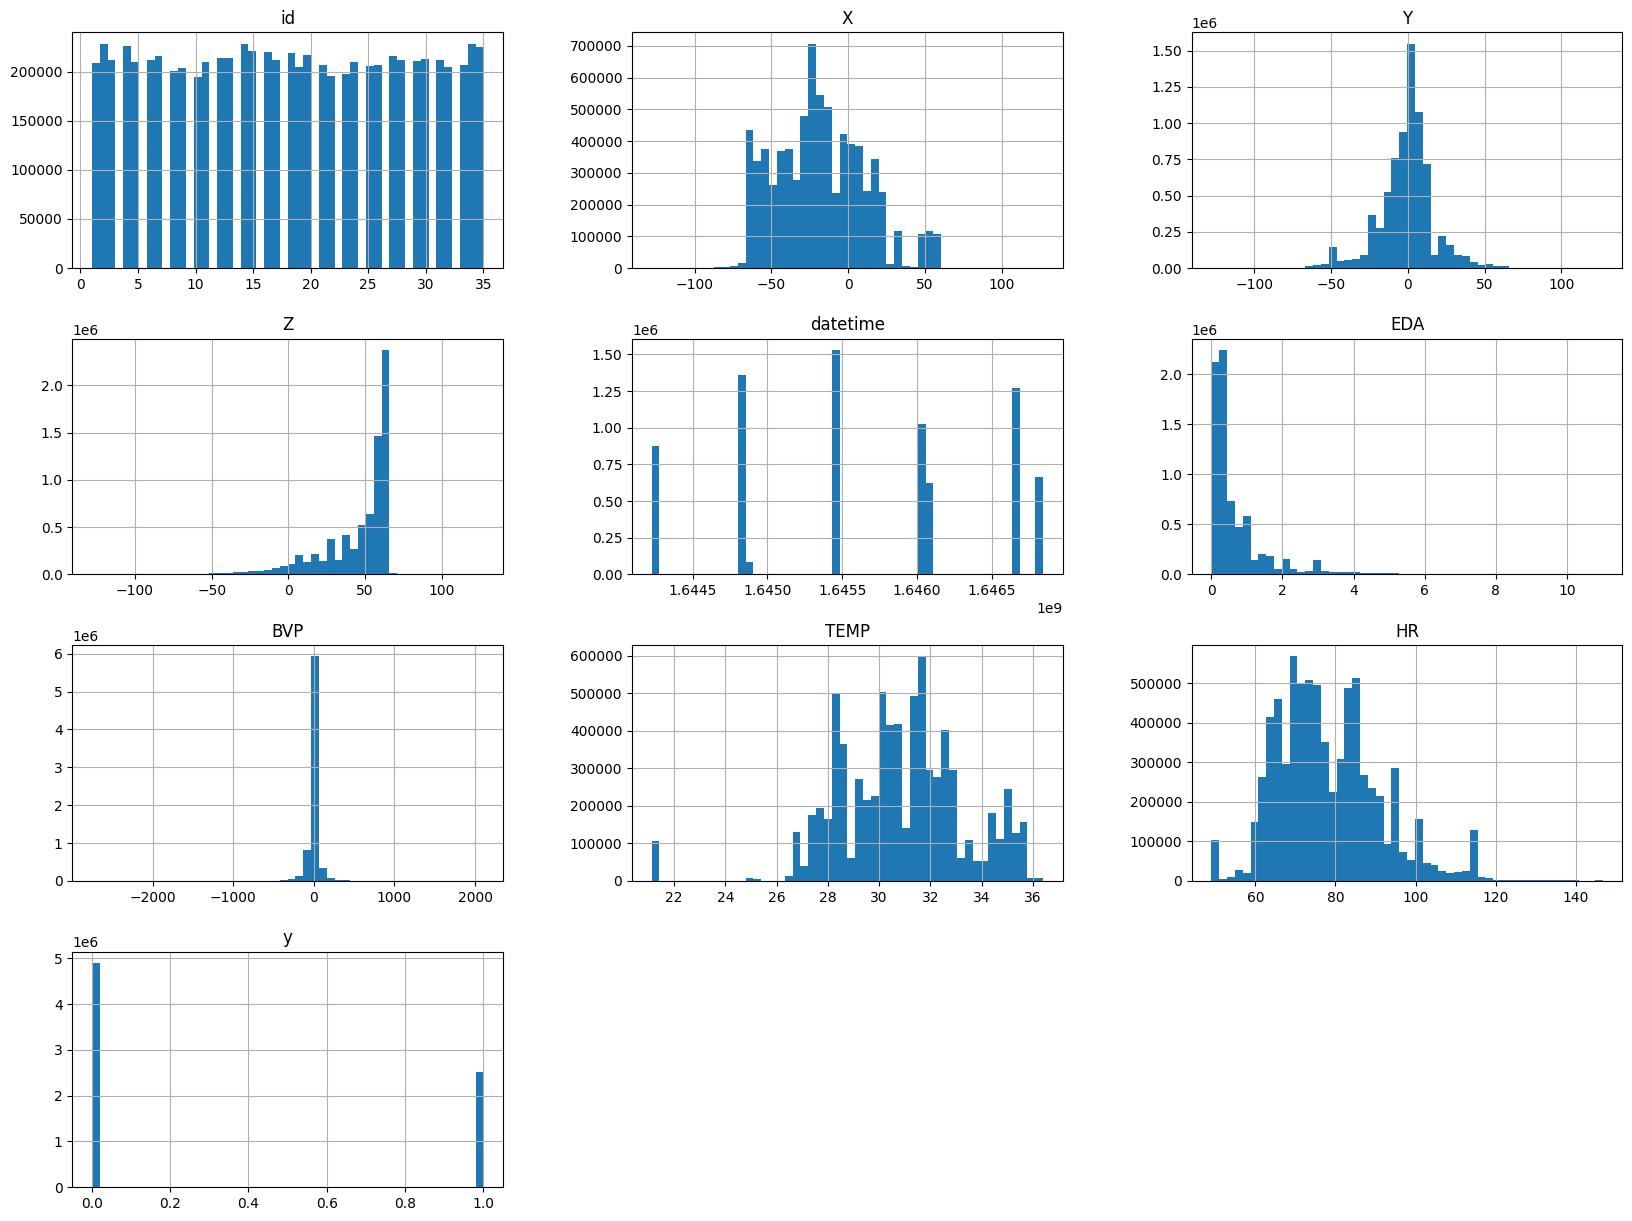

In [31]:
# visualise variables
_ = df.hist(bins=50, figsize=(20,15))

In [32]:
# select participant number 2 for example 
df2 = df[(df['id'] == 2)]
df2

,id,X,Y,Z,datetime,EDA,BVP,TEMP,HR,y
0,2,2.0,10.0,63.0,1.644228e+09,0.00000,-0.00,34.79,118.00,0
1,2,4.0,12.0,66.0,1.644228e+09,0.00000,-0.00,34.79,118.00,0
2,2,-1.0,13.0,63.0,1.644228e+09,0.00000,-0.00,34.79,118.00,0
3,2,-7.0,11.0,59.0,1.644228e+09,0.00000,-0.00,34.79,118.00,0
4,2,-7.0,6.0,57.0,1.644228e+09,0.00000,-0.00,34.79,118.00,0
...,...,...,...,...,...,...,...,...,...,...
228171,2,21.0,-2.0,63.0,1.644231e+09,0.02691,-0.57,30.81,63.38,0
228172,2,21.0,-2.0,63.0,1.644231e+09,0.02691,-5.74,30.81,63.38,0
228173,2,21.0,-2.0,63.0,1.644231e+09,0.02691,-11.50,30.81,63.38,0
228174,2,21.0,-2.0,63.0,1.644231e+09,0.02691,-11.50,30.81,63.38,0


In [34]:
# visualise relationship between y and given variable line chart
# parameters : y_axis - input variable ( should be string ), participant_no -  participant number ( should be number -int)
# this fuction provides lightblue color background for y == 1 ( witch means stress )
def plot_line_chart(y_axis, participant_no):

  df_temp = df[(df['id'] == participant_no)]

  # create x and y axis
  x = df_temp['datetime']
  y = df_temp[y_axis]

  # create the plot
  fig, ax = plt.subplots()

  # plot the data
  ax.plot(x, y)

  # set the color spans for the x-axis ranges
  if len(data['0' + str(participant_no)]) > 5 :
    ranges = [(data['02'][0], data['02'][1], 'lightblue', 0.5), (data['02'][2], data['02'][3], 'lightblue', 0.5),(data['02'][4], data['02'][5], 'lightblue', 0.5)]
  else:
    ranges = [(data['02'][0], data['02'][1], 'lightblue', 0.5), (data['02'][2], data['02'][3], 'lightblue', 0.5)]
  for r in ranges:
      ax.axvspan(*r[:-2], color=r[-2], alpha=r[-1])

  # Show the plot
  plt.show()


# Trying to identify relation between input signals and stress by just analysing graph ( by human intelligence, of course)

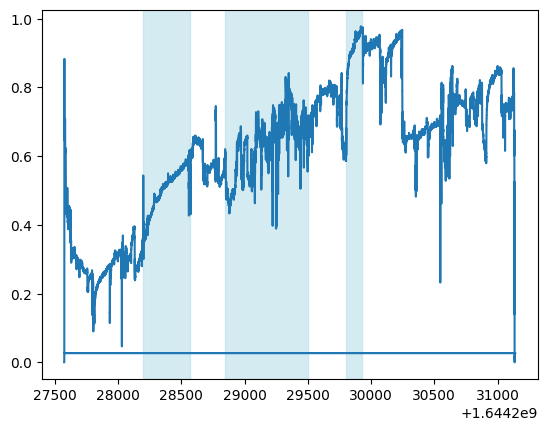

In [35]:
# visualise relationship between y and EDA
plot_line_chart('EDA', 2)

Relation between eda and stress level have positive relationship. but not every time. have give some weight for eda variable

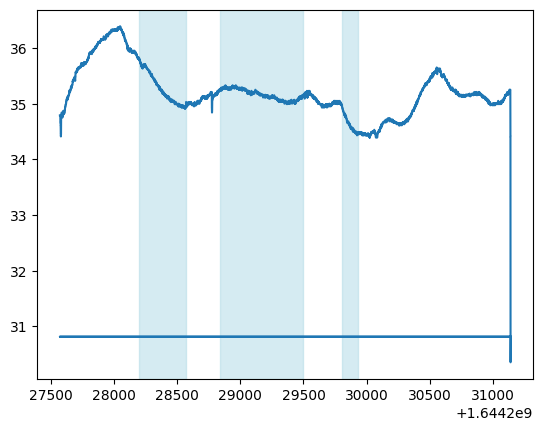

In [36]:
# visualise relationship between y and TEMP
plot_line_chart('TEMP', 2)

Relation between body temperature and stress level almost no relationship. at least for human sense. so we unable to give high weight to this signal

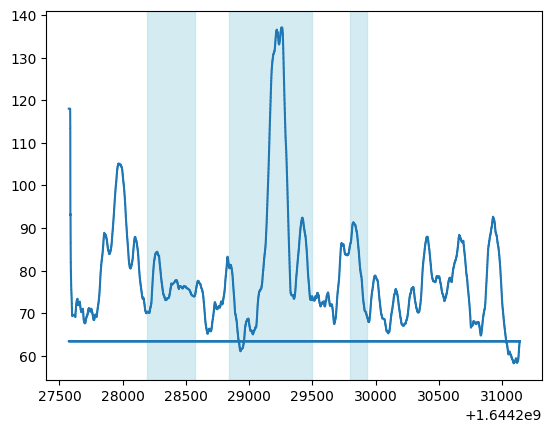

In [38]:
# visualise relationship between y and HR
plot_line_chart('HR', 2)

Relation between heart rate and stress level have a relationship. when participant is in stress heart rate show significant uppr spark. but it's not always ture. we can give some amount of weight for heart rate

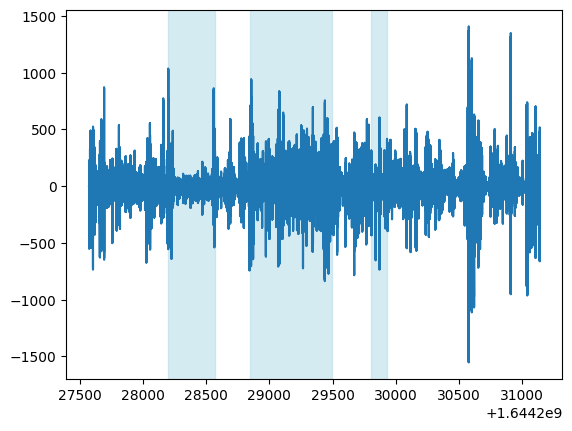

In [39]:
# visualise relationship between y and BVP
plot_line_chart('BVP', 2)

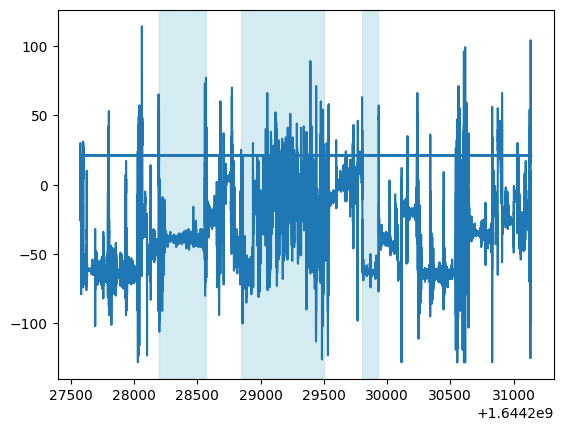

In [40]:
# visualise relationship between y and X
plot_line_chart('X', 2)

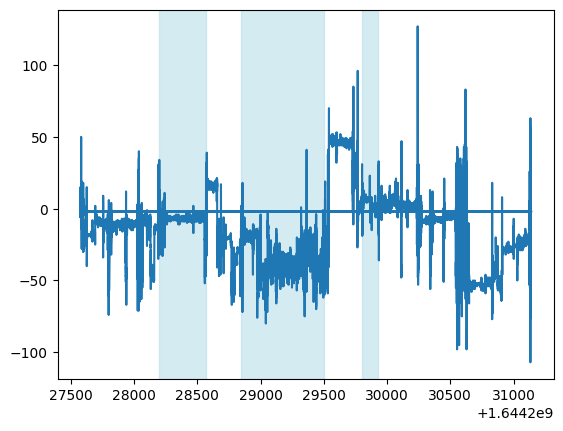

In [41]:
# visualise relationship between y and Y
plot_line_chart('Y', 2)

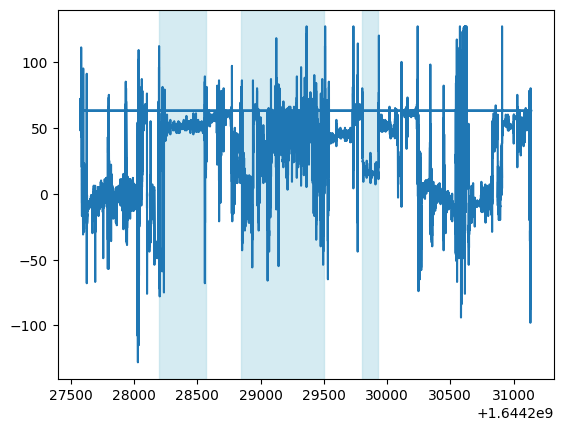

In [42]:
# visualise relationship between y and Z
plot_line_chart('Z', 2)

Relation between x, y, z  and stress level almost no relationship. but we can't ignore it yet

In [43]:
# visualise relationship between y and given variable by scatter plot
# parameters : y_axis - input variable ( should be string )

def plot_scatter_plot(y_axis):
  # create x and y axis
  x = df2['datetime']
  y = df2[y_axis]

  # create scatter plot
  plt.scatter(x, y)

  # add x and y axis labels
  plt.xlabel("X-axis label")
  plt.ylabel("Y-axis label")

  # show plot
  plt.show()

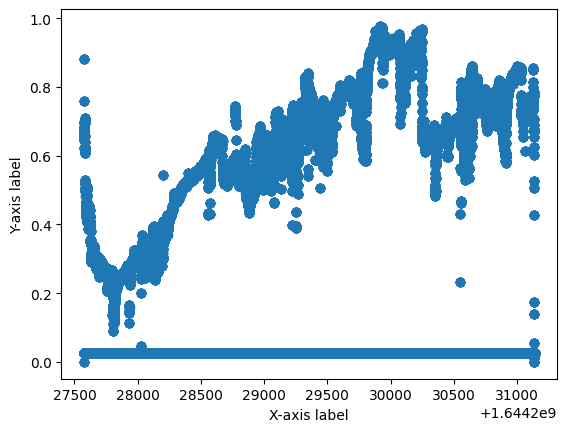

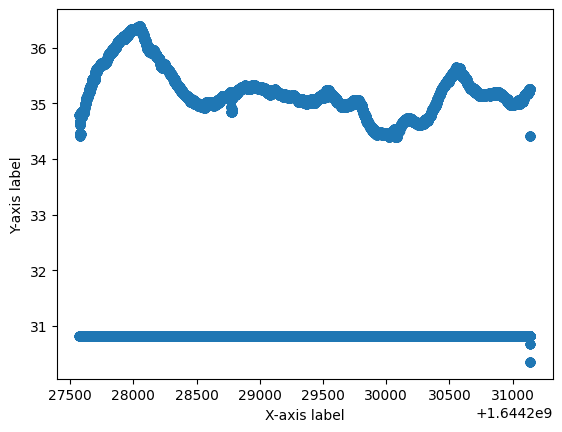

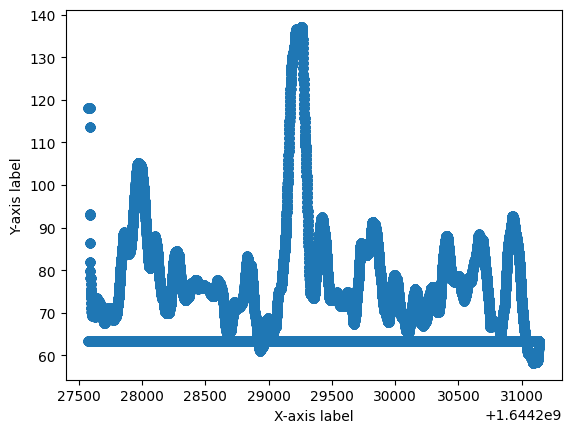

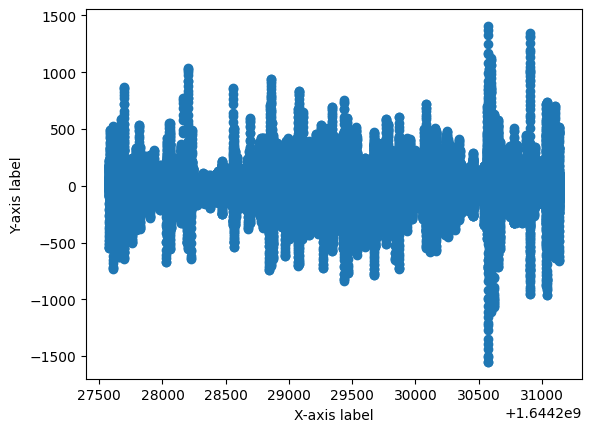

In [45]:
# visualize with scatter plot
plot_scatter_plot('EDA')
plot_scatter_plot('TEMP')
plot_scatter_plot('HR')
plot_scatter_plot('BVP')

In [46]:
# visualise relationship between y and given variable by box plot
# parameters : y_axis - input variable ( should be string )

def plot_box_plot(y_axis):
  # data
  data = df2[y_axis]

  fig, ax = plt.subplots()
  ax.boxplot(data)

  # set the axis labels and title
  ax.set_title('Box plot')
  ax.set_xlabel('Data')
  ax.set_ylabel('Value')

  # show the plot
  plt.show()

**Median**: The median is represented by a horizontal line inside the box, which splits the data into two equal parts.

**Box**: The box represents the middle 50% of the data and is drawn between the first quartile (Q1) and the third quartile (Q3).

**Whiskers**: The whiskers extend from the box to the minimum and maximum values that are not considered outliers. They can be defined in different ways, such as 1.5 times the interquartile range (IQR) or a fixed distance from the quartiles.

**Outliers**: Outliers are individual data points that fall outside the whiskers and are represented as individual points.

**Notches**: Notches can be added to the sides of the box to represent the uncertainty of the median. A wider notch indicates greater uncertainty.

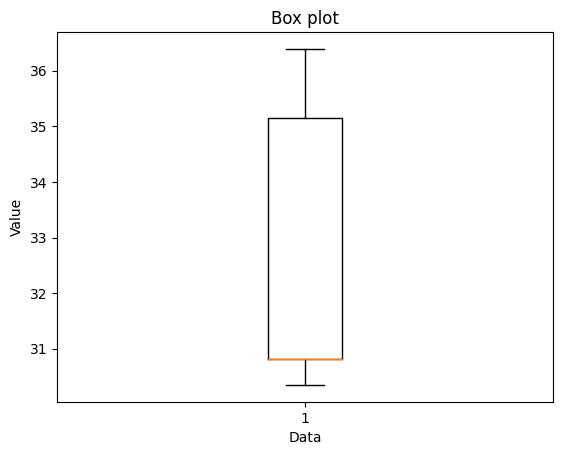

In [47]:
plot_box_plot('TEMP')

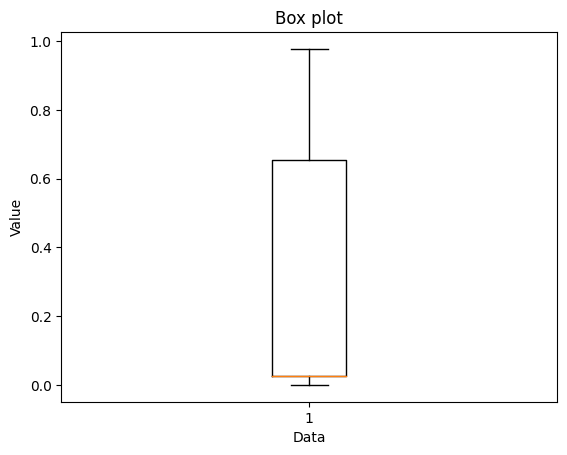

In [48]:
plot_box_plot('EDA')

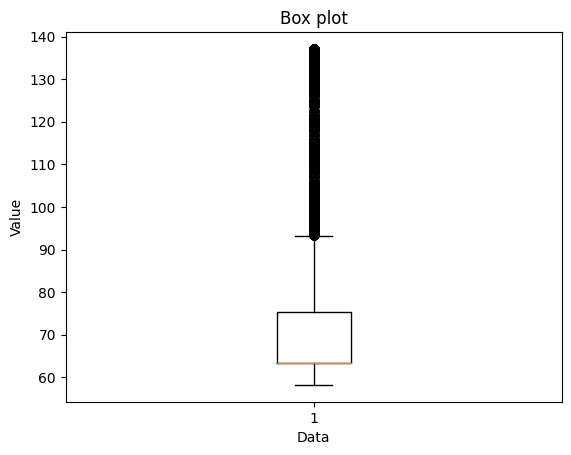

In [49]:
plot_box_plot('HR')

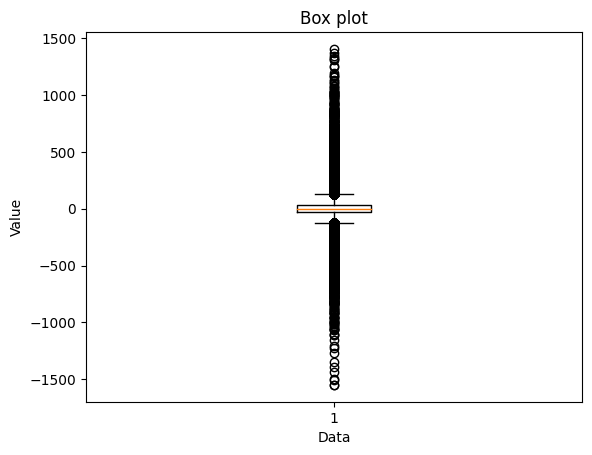

In [50]:
plot_box_plot('BVP')

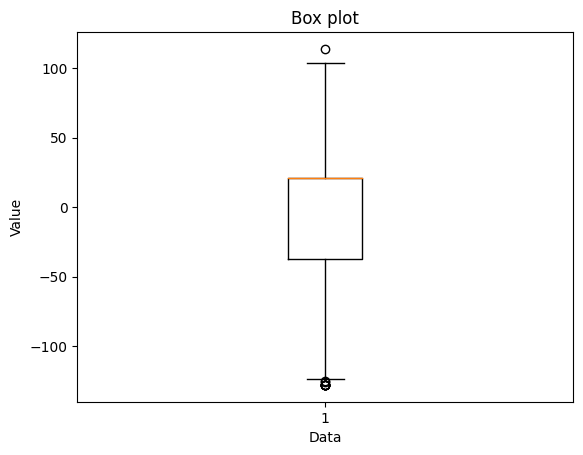

In [51]:
plot_box_plot('X')

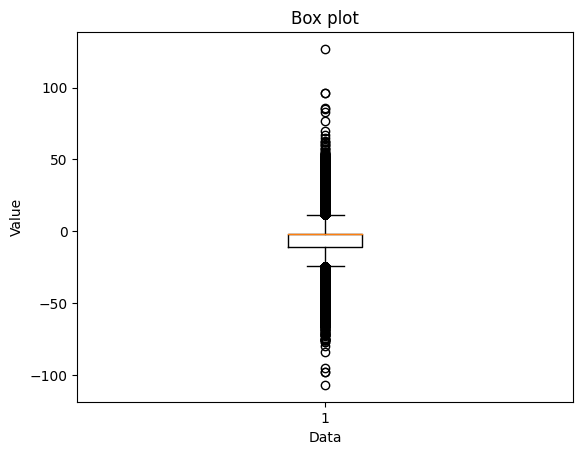

In [52]:
plot_box_plot('Y')

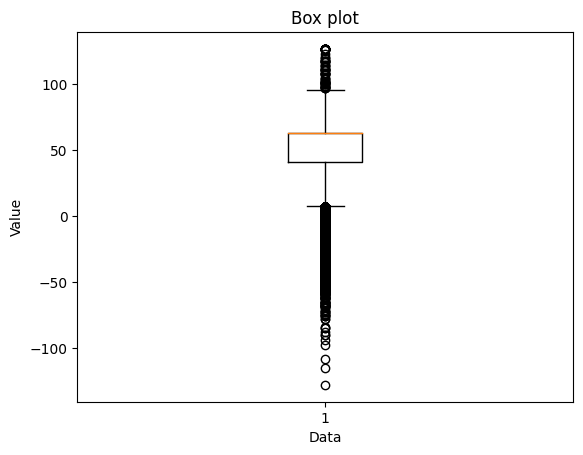

In [53]:
plot_box_plot('Z')

# Step 04 - Calculate respiratory rate from BVP

According to research paper - Additionally, respiratory rate was estimated using the BVP signal. Statistical models and personalised adaptive reference ranges were used to determine the utility of the proposed stressors and the extracted variables (heart rate and respiratory rate).

In [157]:
# Load data from CSV file ( ex : participant no 02)
data = pd.read_csv('/content/Stress-Predict-Dataset/Raw_data/S02/BVP.csv')

# Extract PPG signal from data
ppg_data = np.array(data[2:300])
ppg_data = ppg_data.reshape(298, )

print('shape ', ppg_data.shape)



# Step 1: Preprocessing
ppg_data = signal.detrend(ppg_data)  # remove linear trend
ppg_data = signal.medfilt(ppg_data, 11)  # apply median filter

# Step 2: Peak Enhancement
peaks, _ = signal.find_peaks(ppg_data, distance=32, height=0.3, prominence=0.1)

print('peaks', peaks)

# Step 3: Entropy-Based Signal Quality Index (ESQI)
def compute_esqi(signal):
    x_squared = signal ** 2
    esqi = -np.sum(x_squared * np.log(x_squared)) / len(signal)
    if np.isnan(esqi):
        esqi = 0
    return esqi

esqi = compute_esqi(ppg_data)

if esqi == 0:
    print('Signal quality is too low, unable to estimate respiratory rate')
else:
    # Step 4: Peak Detection
    rr_intervals = np.diff(peaks)
    mean_rr_interval = np.mean(rr_intervals)
    valid_peaks = [peaks[0]]  # always keep first peak
    for i in range(1, len(peaks)):
        if rr_intervals[i-1] >= 0.2 * mean_rr_interval:
            valid_peaks.append(peaks[i])

    # Step 5: Respiratory Rate Estimation
    ibi = np.diff(valid_peaks)
    freqs, psd = signal.welch(ibi, fs=1/mean_rr_interval, nperseg=64)
    resp_rate = freqs[np.argmax(psd)] * 60 * len(peaks) * 10
    print('Estimated respiratory rate:', resp_rate, 'breaths per minute')


shape  (298,)
peaks [ 76 119 243 282]
Estimated respiratory rate: 11.650485436893202 breaths per minute


/usr/local/lib/python3.9/dist-packages/scipy/signal/_spectral_py.py:2014: UserWarning: nperseg = 64 is greater than input length  = 3, using nperseg = 3
  warnings.warn('nperseg = {0:d} is greater than input length '


In [159]:
# Load merged data from a CSV file into a Pandas DataFrame.
df = pd.read_csv('save/merged_data_without_null_with_lables.csv')
# Round the 'datetime' column values to the nearest integer.
df.datetime = df.datetime.round()
# Display the first few rows of the DataFrame to verify the data was loaded correctly.
df.head()

,id,X,Y,Z,datetime,EDA,BVP,TEMP,HR,y
0,2,2.0,10.0,63.0,1.644228e+09,0.0,-0.0,34.79,118.0,0
1,2,4.0,12.0,66.0,1.644228e+09,0.0,-0.0,34.79,118.0,0
2,2,-1.0,13.0,63.0,1.644228e+09,0.0,-0.0,34.79,118.0,0
3,2,-7.0,11.0,59.0,1.644228e+09,0.0,-0.0,34.79,118.0,0
4,2,-7.0,6.0,57.0,1.644228e+09,0.0,-0.0,34.79,118.0,0


In [160]:
# This function takes a Blood Volume Pulse (BVP) signal as input and calculates the respiratory rate in breaths per minute.
def get_respiratory_rate(bvp, sample_rate=64):

    try:
        # The BVP signal is first filtered using a bandpass filter with a cutoff frequency of 0.1-0.4 Hz.
        # Define bandpass filter parameters
        lowcut = 0.1  # Hz
        highcut = 0.4  # Hz
        order = 2

        # The filtered signal is then analyzed to detect peaks using a specified threshold and minimum distance between peaks.
        # Define peak detection parameters
        threshold = 0.3
        distance = 32  # Minimum distance between peaks (in samples)

        # Apply bandpass filter to BVP signal
        nyq = 0.3 * sample_rate
        low = lowcut / nyq
        high = highcut / nyq
        b, a = butter(order, [low, high], btype='band')
        filtered_bvp = filtfilt(b, a, bvp)

        # Find peaks in filtered signal
        peaks, _ = find_peaks(filtered_bvp, height=threshold, distance=distance)

        # Calculate respiratory rate (in breaths per minute)
        if len(peaks) > 0:
            respiratory_rate = 60 * len(peaks) / (len(filtered_bvp) / sample_rate) /11
            # print('Estimated respiratory rate:', respiratory_rate, 'breaths per minute')
        else:
            # If no peaks are detected, the function returns a value of -1.
            respiratory_rate = -1
            # print('No peaks detected in filtered signal')
    except:
        # If an error occurs during processing, the function also returns a value of -1.
        respiratory_rate = -1

    return respiratory_rate

In [161]:
# Create an empty dataframe with only column names
new_df = pd.DataFrame(columns=['id','X','Y','Z','datetime','EDA','TEMP','HR','respr', 'y' ])

In [162]:
# Initialize variables
id = 0
datetime = 0
temp_bvp_arr = []
new_df = pd.DataFrame()

# Loop through each row in the dataframe
for index, row in tqdm(df.iterrows(), total=df.shape[0]):

    # Check if the id is the first one in the dataset
    if id == 0:
        # Store values from the first row
        id = row['id']
        X = row['X']
        Y = row['Y']
        Z = row['Z']
        datetime = row['datetime']
        EDA = row['EDA']
        BVP = row['BVP']
        TEMP = row['TEMP']
        HR = row['HR']
        y = row['y']
    else:
        # Check if the current row has the same id and datetime as the previous row
        if id == row['id'] and datetime == row['datetime']:
            # Add BVP value to temporary array
            temp_bvp_arr.append(row['BVP'])
            X = row['X']
            Y = row['Y']
            Z = row['Z']
            datetime = row['datetime']
            EDA = row['EDA']
            TEMP = row['TEMP']
            HR = row['HR']
            y = row['y']
        else:
            # Calculate respiratory rate from BVP values in temporary array
            respiratory_rate = get_respiratory_rate(np.array(temp_bvp_arr))

            # Check if a valid respiratory rate was calculated
            if respiratory_rate != -1:
                # Create a new row for the output dataframe with respiratory rate and other values
                new_row = {'id': id, 'X': X, 'Y': Y, 'Z': Z, 'datetime': datetime,
                           'EDA': EDA, 'TEMP': TEMP, 'HR': HR, 'respr': respiratory_rate, 'y': y}
                # Add the new row to the output dataframe
                new_df = pd.concat([new_df, pd.DataFrame(
                    new_row, index=[0])], ignore_index=True)

            # Clear the temporary BVP array and store values from the current row
            temp_bvp_arr.clear()
            id = row['id']
            temp_bvp_arr.append(row['BVP'])
            X = row['X']
            Y = row['Y']
            Z = row['Z']
            datetime = row['datetime']
            EDA = row['EDA']
            TEMP = row['TEMP']
            HR = row['HR']
            y = row['y']

# Write the final output dataframe to a CSV file
new_df.to_csv('save/finalise_dataset_with_resper_last.csv', index=False)

# Print a message indicating that the script has finished running
print('Resper calculation completed')


  0%|          | 0/7428543 [00:00<?, ?it/s]

Resper calculation completed


In [163]:
# copy created csv files into google drive asap
connect_with_google_drive('save', 'finalise_dataset_with_resper_last.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data has been copy to google drive


In [164]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50979 entries, 0 to 50978
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        50979 non-null  float64
 1   X         50979 non-null  float64
 2   Y         50979 non-null  float64
 3   Z         50979 non-null  float64
 4   datetime  50979 non-null  float64
 5   EDA       50979 non-null  float64
 6   TEMP      50979 non-null  float64
 7   HR        50979 non-null  float64
 8   respr     50979 non-null  float64
 9   y         50979 non-null  float64
dtypes: float64(10)
memory usage: 3.9 MB


In [165]:
new_df.head()

,id,X,Y,Z,datetime,EDA,TEMP,HR,respr,y
0,2.0,3.0,1.0,61.0,1.644228e+09,0.649941,34.79,118.0,11.260997,0.0
1,2.0,-2.0,7.0,64.0,1.644228e+09,0.664036,34.79,118.0,10.578512,0.0
2,2.0,-17.0,5.0,61.0,1.644228e+09,0.681976,34.66,118.0,10.578512,0.0
3,2.0,-19.0,2.0,72.0,1.644228e+09,0.701197,34.47,118.0,10.578512,0.0
4,2.0,-31.0,4.0,56.0,1.644228e+09,0.624313,34.75,118.0,11.260997,0.0


# Step 05 - Prepossessing Data

In [65]:
# importing libraries 
import os
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import multiprocessing
import time
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from scipy.signal import butter, filtfilt, find_peaks
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.over_sampling import ADASYN, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import resample
from sklearn.utils.class_weight import compute_class_weight
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Just in case if you try to run this part later. colab may not have previous folders
# So we just check save folder is available or not
if not os.path.exists('/content/save'):
  print('You are late.. No worries just go on')
  os.makedirs('/content/save')
else:
  print('You already have save folder. go head!')

# copy created files from google drive
connect_with_google_drive('load', 'finalise_dataset_with_resper_last.csv')

# Note: the path "/content/drive/MyDrive/" may vary depending on the location of the file on your Google Drive. 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
You are late.. No worries just go on


In [4]:
# Load the dataset into a Pandas DataFrame
all_df = pd.read_csv('save/finalise_dataset_with_resper_last.csv')
# Ensuring that leave a subset of data separate from the exploration to avoid overfitting.
# Randomly sample 70% of your dataframe
df = all_df.sample(frac=0.7)

In [5]:
# Here is rest 30% data 
df_test = all_df.loc[~all_df.index.isin(df.index)]
# Save it as csv for later
df_test.to_csv('test_dataset.csv', index=False)

In [11]:
# Check for missing values
print(df.isnull().sum())

id          0
X           0
Y           0
Z           0
datetime    0
EDA         0
TEMP        0
HR          0
respr       0
y           0
dtype: int64


In [ ]:
# **** Don't have to run ***


# We did not get any null values. because null values already managed
# Anyhow if we get null here is the solutions. don't try it now anyway

# Handle missing values
# Option 1: Remove rows with missing values
df.dropna(inplace=True)

# Option 2: Impute missing values with mean
df.fillna(df.mean(), inplace=True)

# Option 3: Impute missing values with median
df.fillna(df.median(), inplace=True)

# Option 4: Impute missing values with mode
df.fillna(df.mode().iloc[0], inplace=True)

# Save the preprocessed dataset to a new csv file
df.to_csv('save/preprocessed_dataset.csv', index=False)

In [7]:
# Check the balance of the target variable
class_counts = df['y'].value_counts()
print(class_counts)

0.0    24275
1.0    11410
Name: y, dtype: int64


Unfortunately, the dataset is not balanced. So we have to deal with that. We can take action mentioned below

01. Undersampling: This involves reducing the number of instances in the majority class to match the number of instances in the minority class. This can be done randomly or with a more sophisticated approach, such as Tomek links or Cluster Centroids.
02. Oversampling: This involves increasing the number of instances in the minority class to match the number of instances in the majority class. This can be done by replicating existing instances or by generating synthetic instances using methods such as Synthetic Minority Over-sampling Technique (SMOTE) or Adaptive Synthetic Sampling (ADASYN).
03. Hybrid Methods: These are a combination of undersampling and oversampling techniques to balance the dataset. Examples include the SMOTE + Tomek links and SMOTE + ENN.
04. Class Weights: This involves assigning a weight to each class in the training data. The weight for the minority class is set to be higher than that of the majority class to give the algorithm more importance to the minority class.

In [10]:
# Separate the features and the target variable
X = df.drop('y', axis=1)
y = df['y']

# Check the balance of the target variable
class_counts = y.value_counts()
print('Class distribution before balancing:')
print(class_counts)

# Undersampling
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)
df_undersampled = pd.concat([X_resampled, y_resampled], axis=1)

# Oversampling
smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X, y)
df_oversampled = pd.concat([X_resampled, y_resampled], axis=1)

# Hybrid Methods
smote_tomek = SMOTETomek(random_state=0)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)
df_smote_tomek = pd.concat([X_resampled, y_resampled], axis=1)

smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)
df_smote_enn = pd.concat([X_resampled, y_resampled], axis=1)

# Class Weights
class_weights = compute_class_weight('balanced', classes=y.unique(), y=y)
class_weights_dict = dict(zip(y.unique(), class_weights))
df_weighted = df.copy()
df_weighted['class_weight'] = df_weighted['y'].apply(lambda x: class_weights_dict[x])

# Save the balanced datasets to CSV files
df_undersampled.to_csv('save/undersampled_dataset.csv', index=False)
df_oversampled.to_csv('save/oversampled_dataset.csv', index=False)
df_smote_tomek.to_csv('save/smote_tomek_dataset.csv', index=False)
df_smote_enn.to_csv('save/smote_enn_dataset.csv', index=False)
df_weighted.to_csv('save/weighted_dataset.csv', index=False)

# Check the balance of the target variable after balancing
print('Class distribution after balancing using RandomUnderSampler:')
print(df_undersampled['y'].value_counts())

print('Class distribution after balancing using SMOTE:')
print(df_oversampled['y'].value_counts())

print('Class distribution after balancing using SMOTE + Tomek links:')
print(df_smote_tomek['y'].value_counts())

print('Class distribution after balancing using SMOTE + ENN:')
print(df_smote_enn['y'].value_counts())

print('Class distribution after balancing using class weights:')
print(df_weighted['y'].value_counts())


Class distribution before balancing:
0.0    24275
1.0    11410
Name: y, dtype: int64
Class distribution after balancing using RandomUnderSampler:
0.0    11410
1.0    11410
Name: y, dtype: int64
Class distribution after balancing using SMOTE:
1.0    24275
0.0    24275
Name: y, dtype: int64
Class distribution after balancing using SMOTE + Tomek links:
1.0    24242
0.0    24242
Name: y, dtype: int64
Class distribution after balancing using SMOTE + ENN:
1.0    23891
0.0    23510
Name: y, dtype: int64
Class distribution after balancing using class weights:
0.0    24275
1.0    11410
Name: y, dtype: int64


**USING SMOTE ENN**

Check for any outliers in the data and decide on how to handle them. Outliers can be detected using various methods such as boxplots, scatterplots, or statistical methods such as z-scores or interquartile ranges.

In [33]:
def visualise_outlier(df, col, visualise=True):
    """
    Visualize potential outliers using boxplots and return a boolean value indicating if outliers were found.

    Parameters:
        df (DataFrame): the dataframe to check for outliers
        col (str): the name of the column to check for outliers

    Returns:
        bool: True if outliers were found, False otherwise
    """
    if visualise:

      # Define the box and outlier properties
      boxprops = dict(linestyle='-', linewidth=2, color='black')
      flierprops = dict(marker='o', markersize=5, markerfacecolor='red', markeredgecolor='red')

      # Create subplots for each variable
      fig, axs = plt.subplots(ncols=1, figsize=(20,10))

      # Plot the boxplot and set the title
      sns.boxplot(data=df, x=col, boxprops=boxprops, flierprops=flierprops)
      axs.set_title(col)

      # Adjust the layout and show the plot
      plt.tight_layout()
      plt.show()

    # Check for outliers and return the result
    q1, q3 = np.percentile(df[col], [25, 75])
    iqr = q3 - q1
    outliers = df[(df[col] < q1 - 1.5*iqr) | (df[col] > q3 + 1.5*iqr)]

    if outliers.empty:
        return False
    else:
        return True


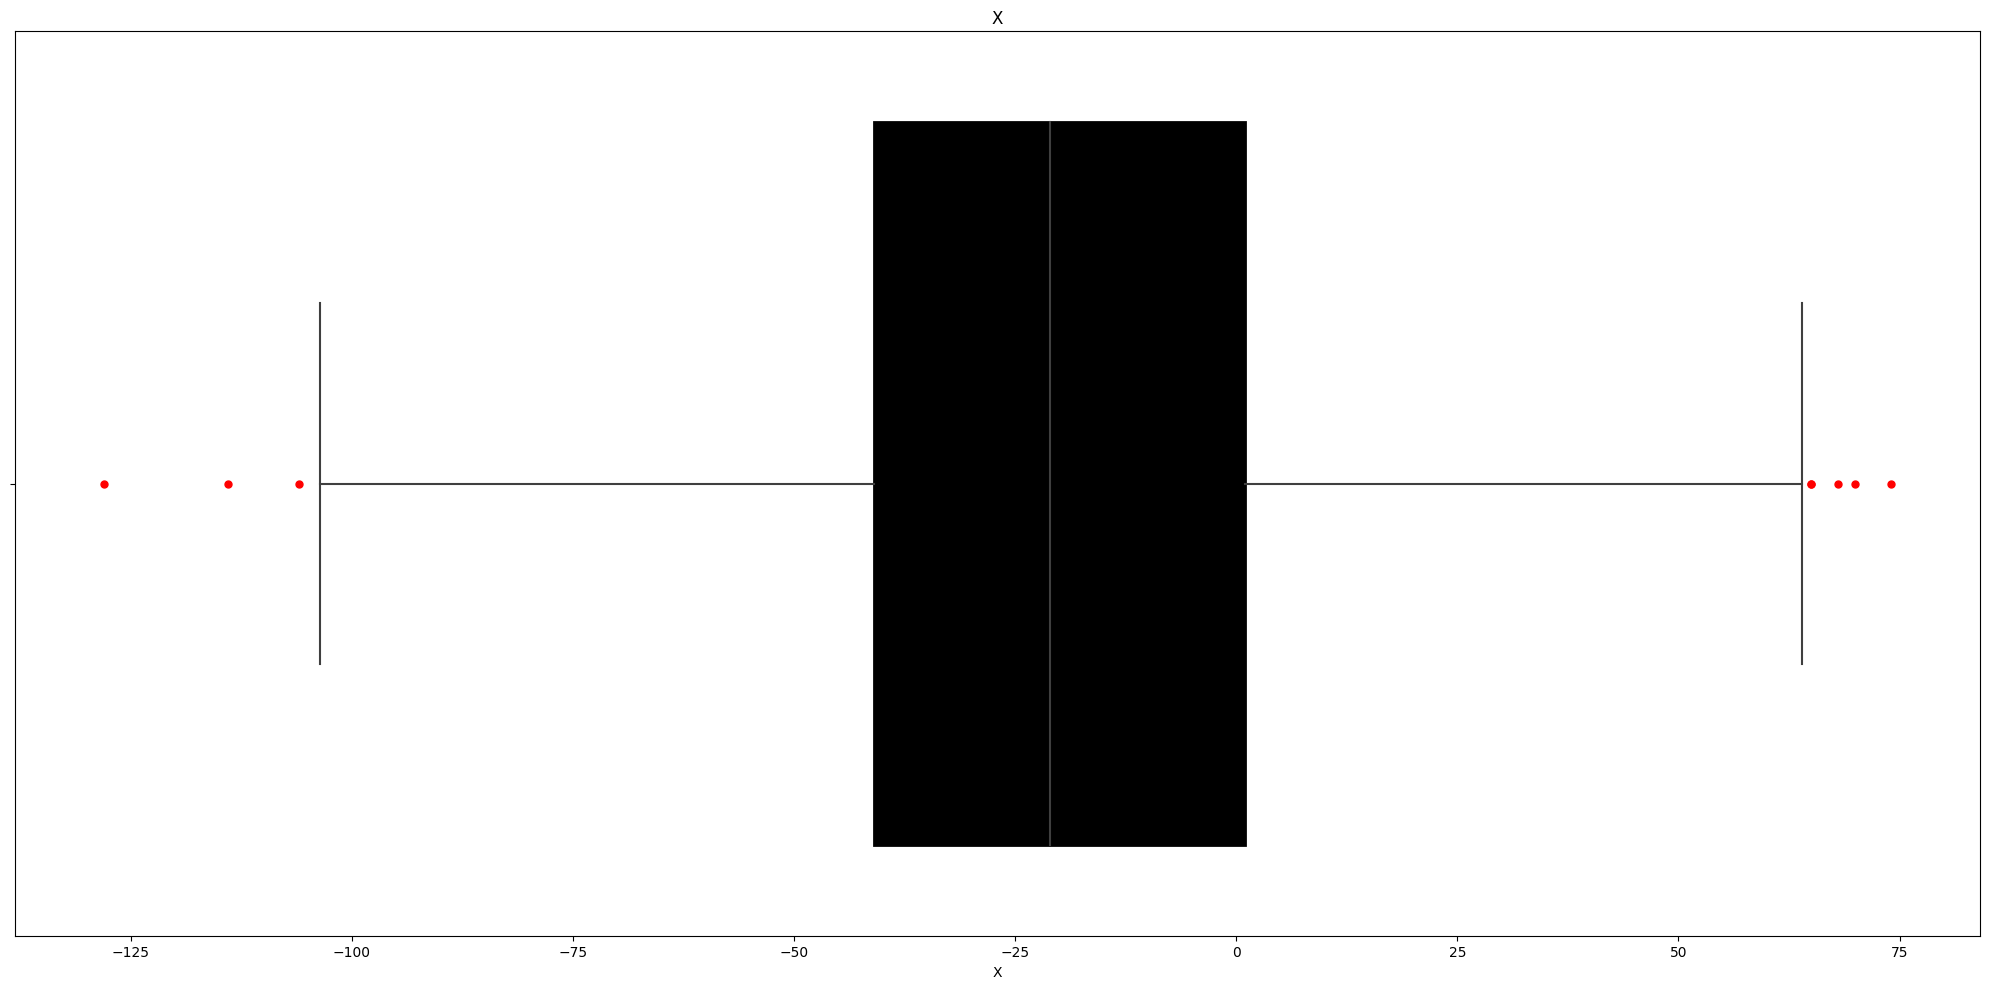

Outliers found in  X


In [34]:
col = 'X'

status = visualise_outlier(df_smote_enn, col)
if status:
  print('Outliers found in ', col)
else:
  print('Outliers not found in ', col, ' good to go')

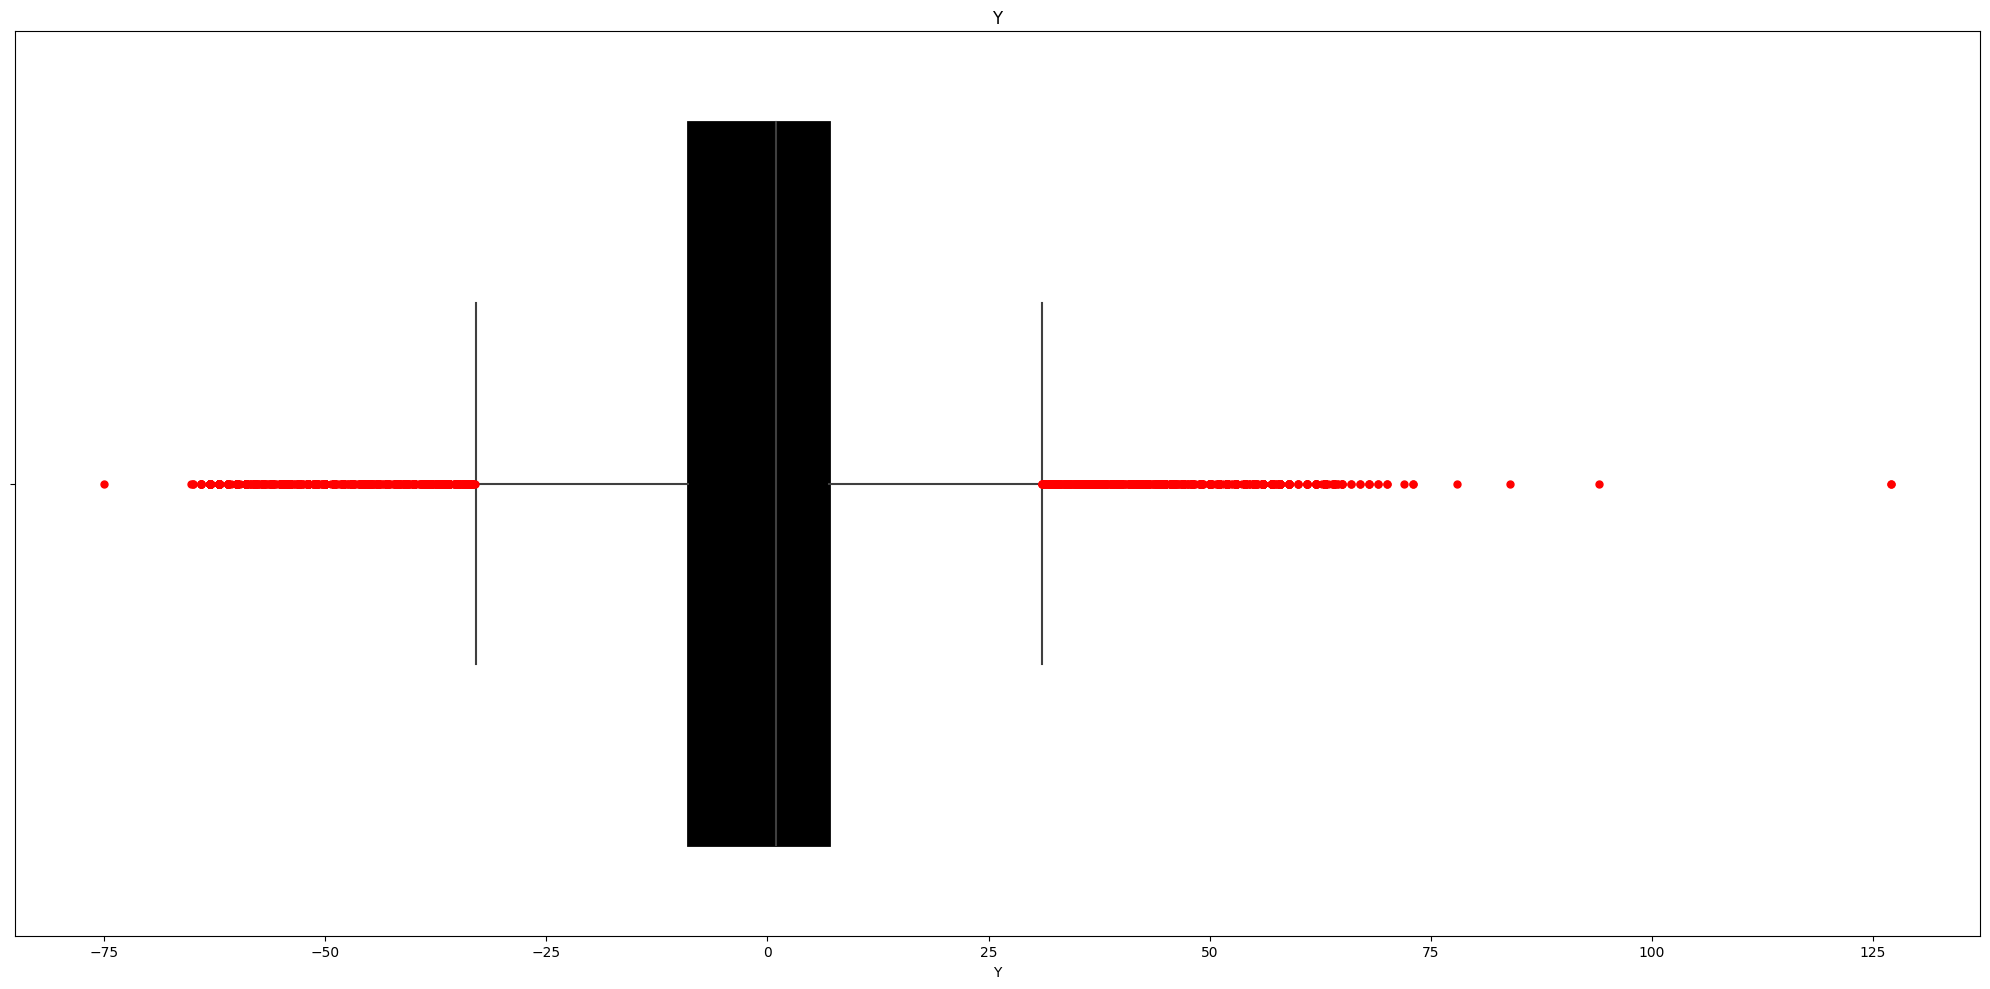

Outliers found in  Y


In [35]:
col = 'Y'

status = visualise_outlier(df_smote_enn, col)
if status:
  print('Outliers found in ', col)
else:
  print('Outliers not found in ', col, ' good to go')

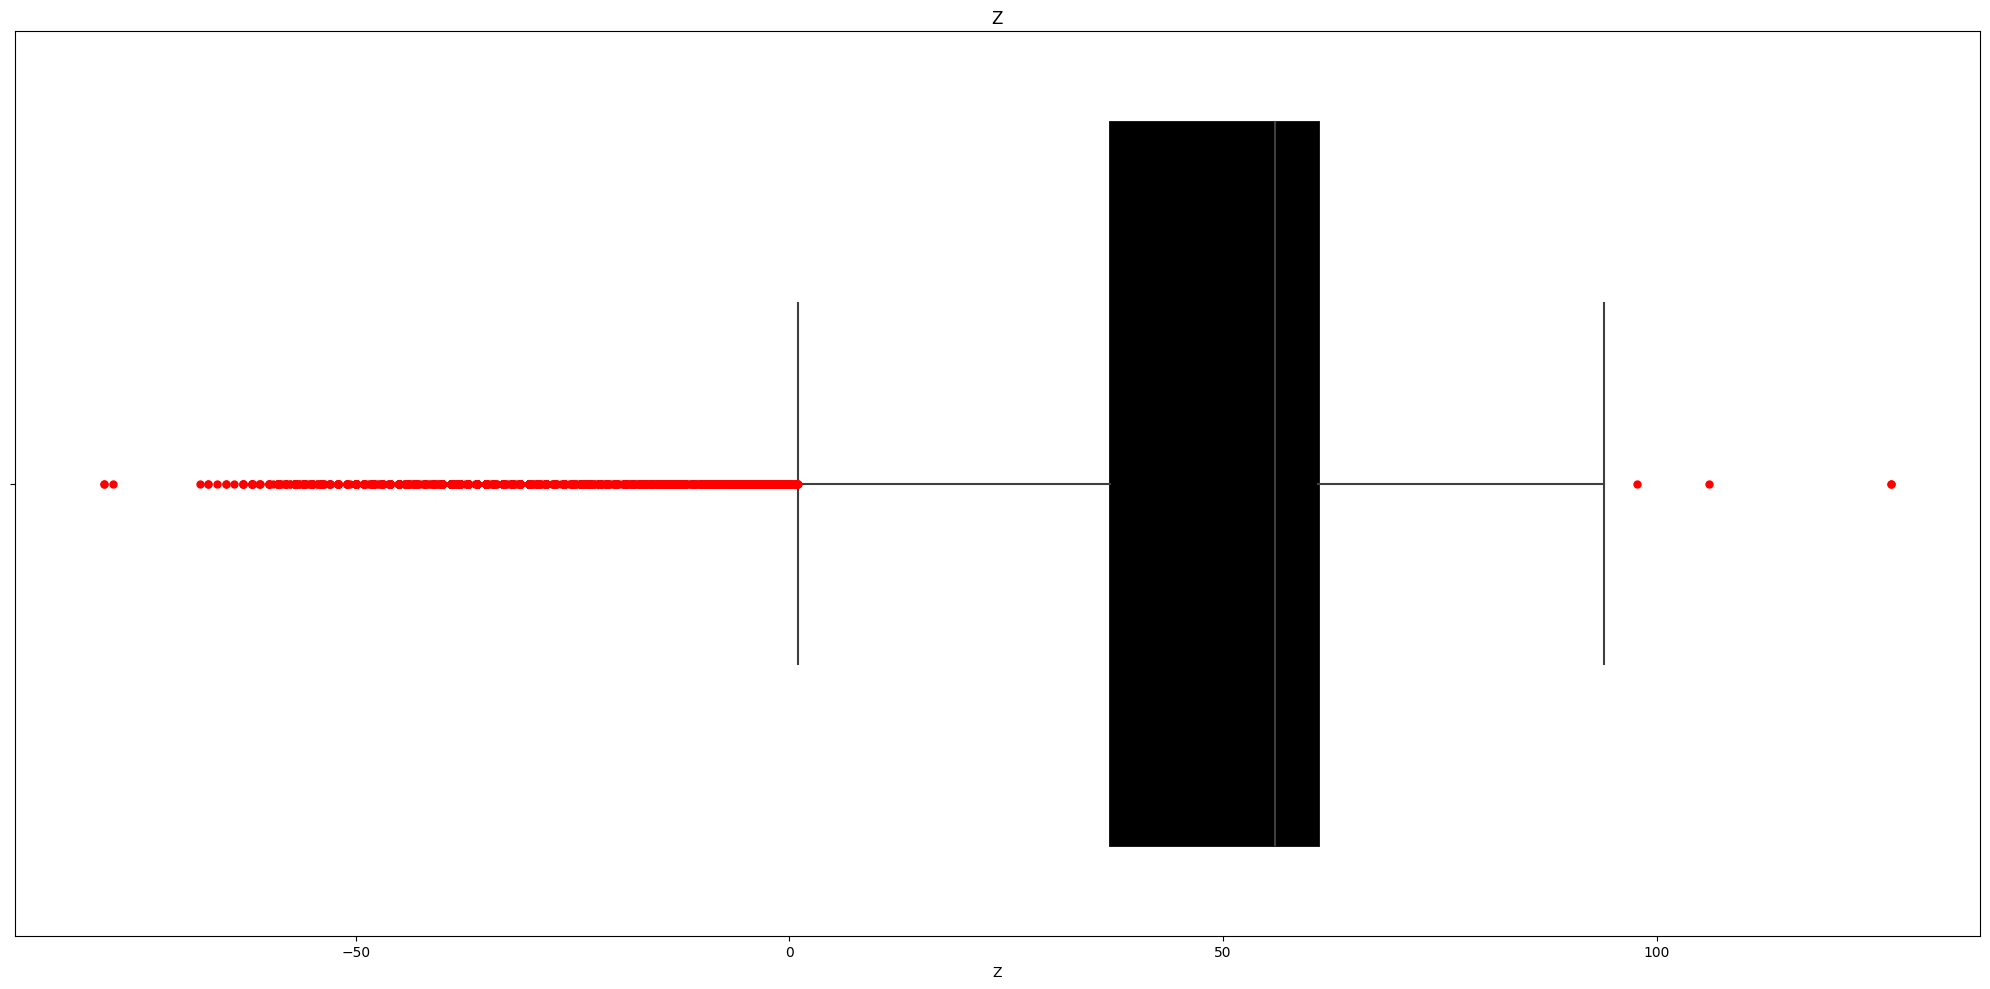

Outliers found in  Z


In [36]:
col = 'Z'

status = visualise_outlier(df_smote_enn, col)
if status:
  print('Outliers found in ', col)
else:
  print('Outliers not found in ', col, ' good to go')

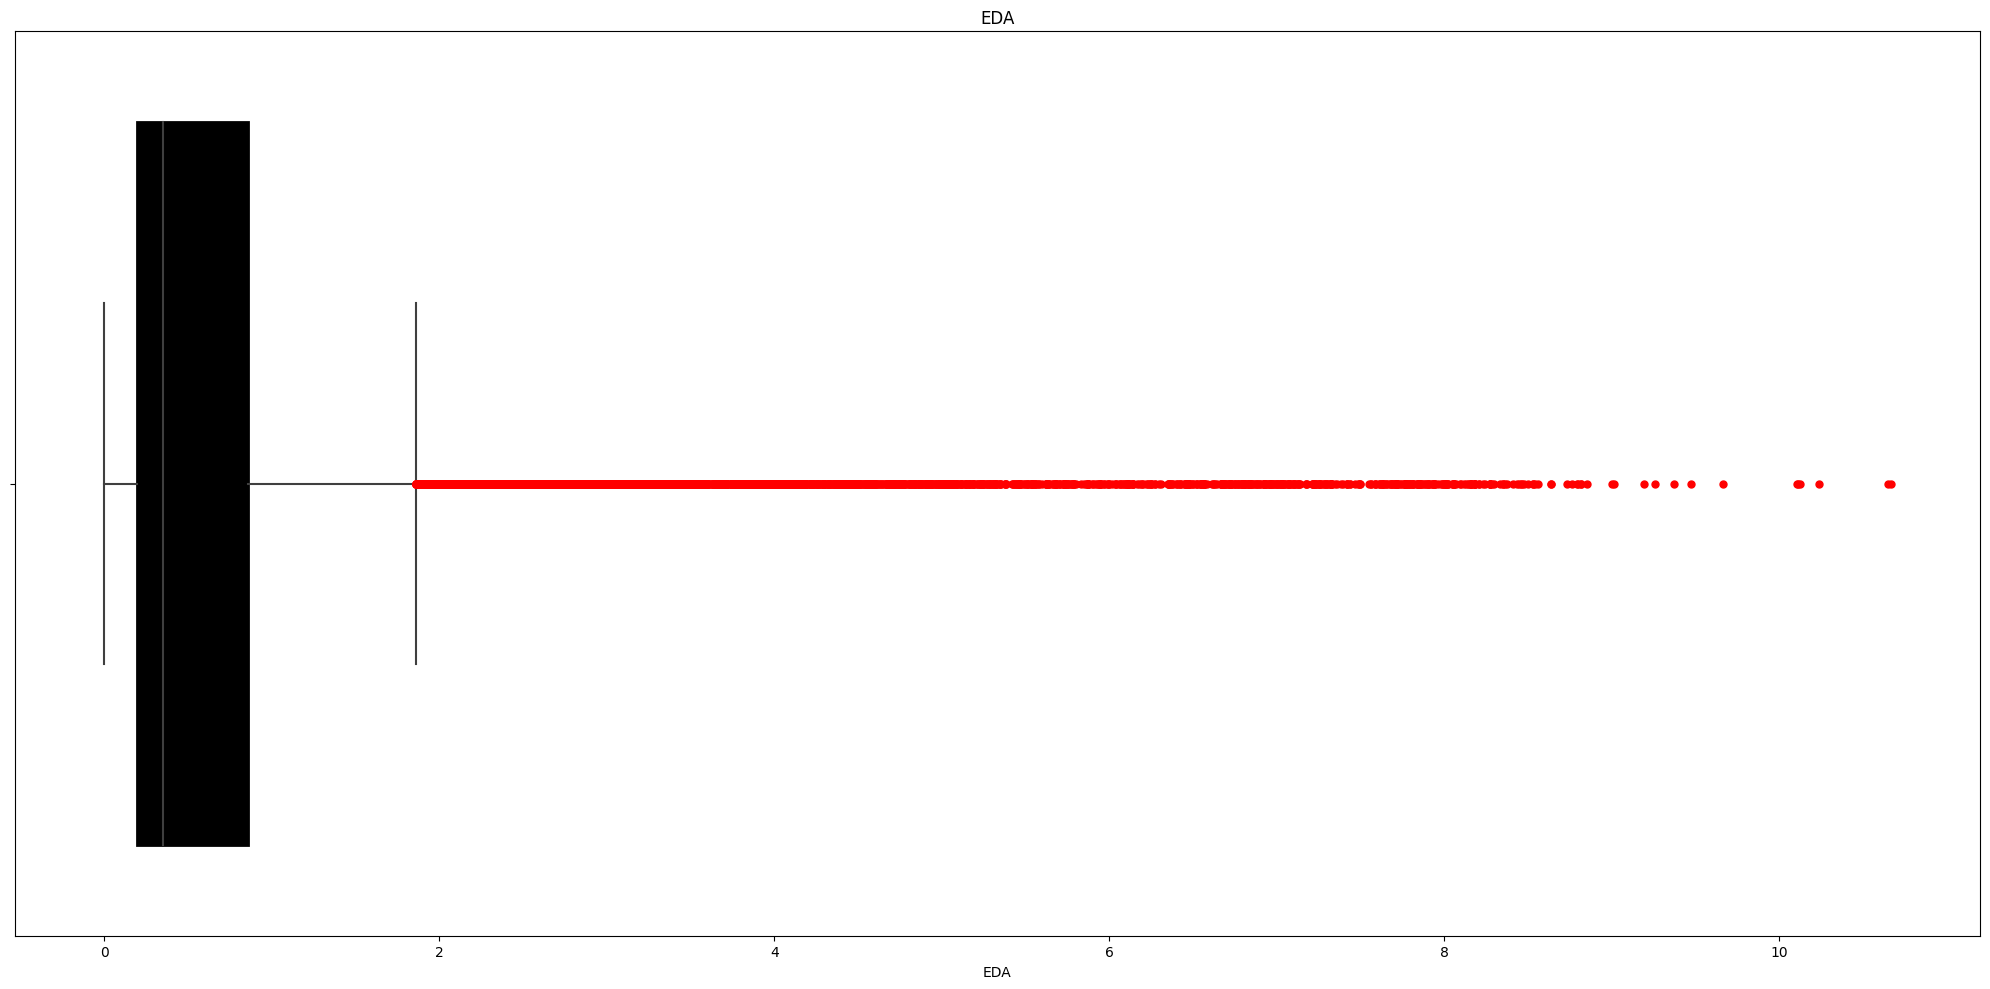

Outliers found in  EDA


In [37]:
col = 'EDA'

status = visualise_outlier(df_smote_enn, col)
if status:
  print('Outliers found in ', col)
else:
  print('Outliers not found in ', col, ' good to go')

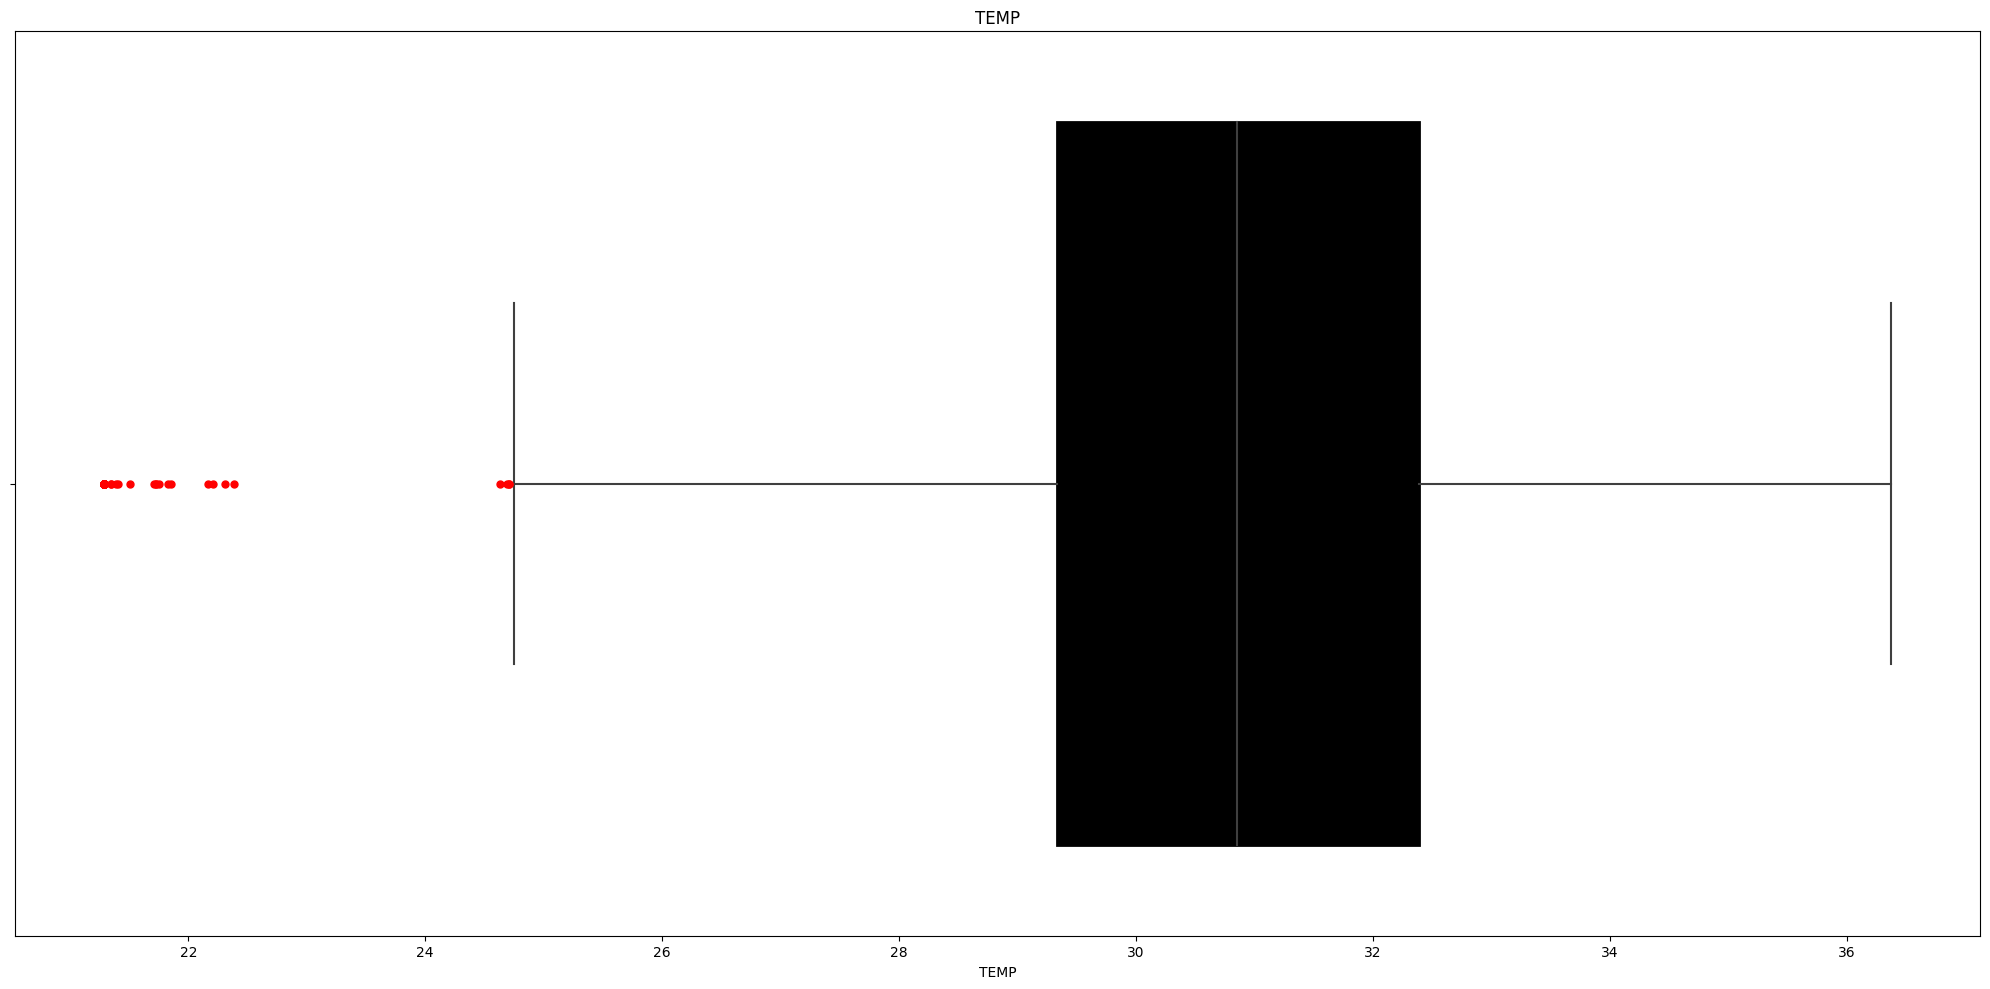

Outliers found in  TEMP


In [38]:
col = 'TEMP'

status = visualise_outlier(df_smote_enn, col)
if status:
  print('Outliers found in ', col)
else:
  print('Outliers not found in ', col, ' good to go')

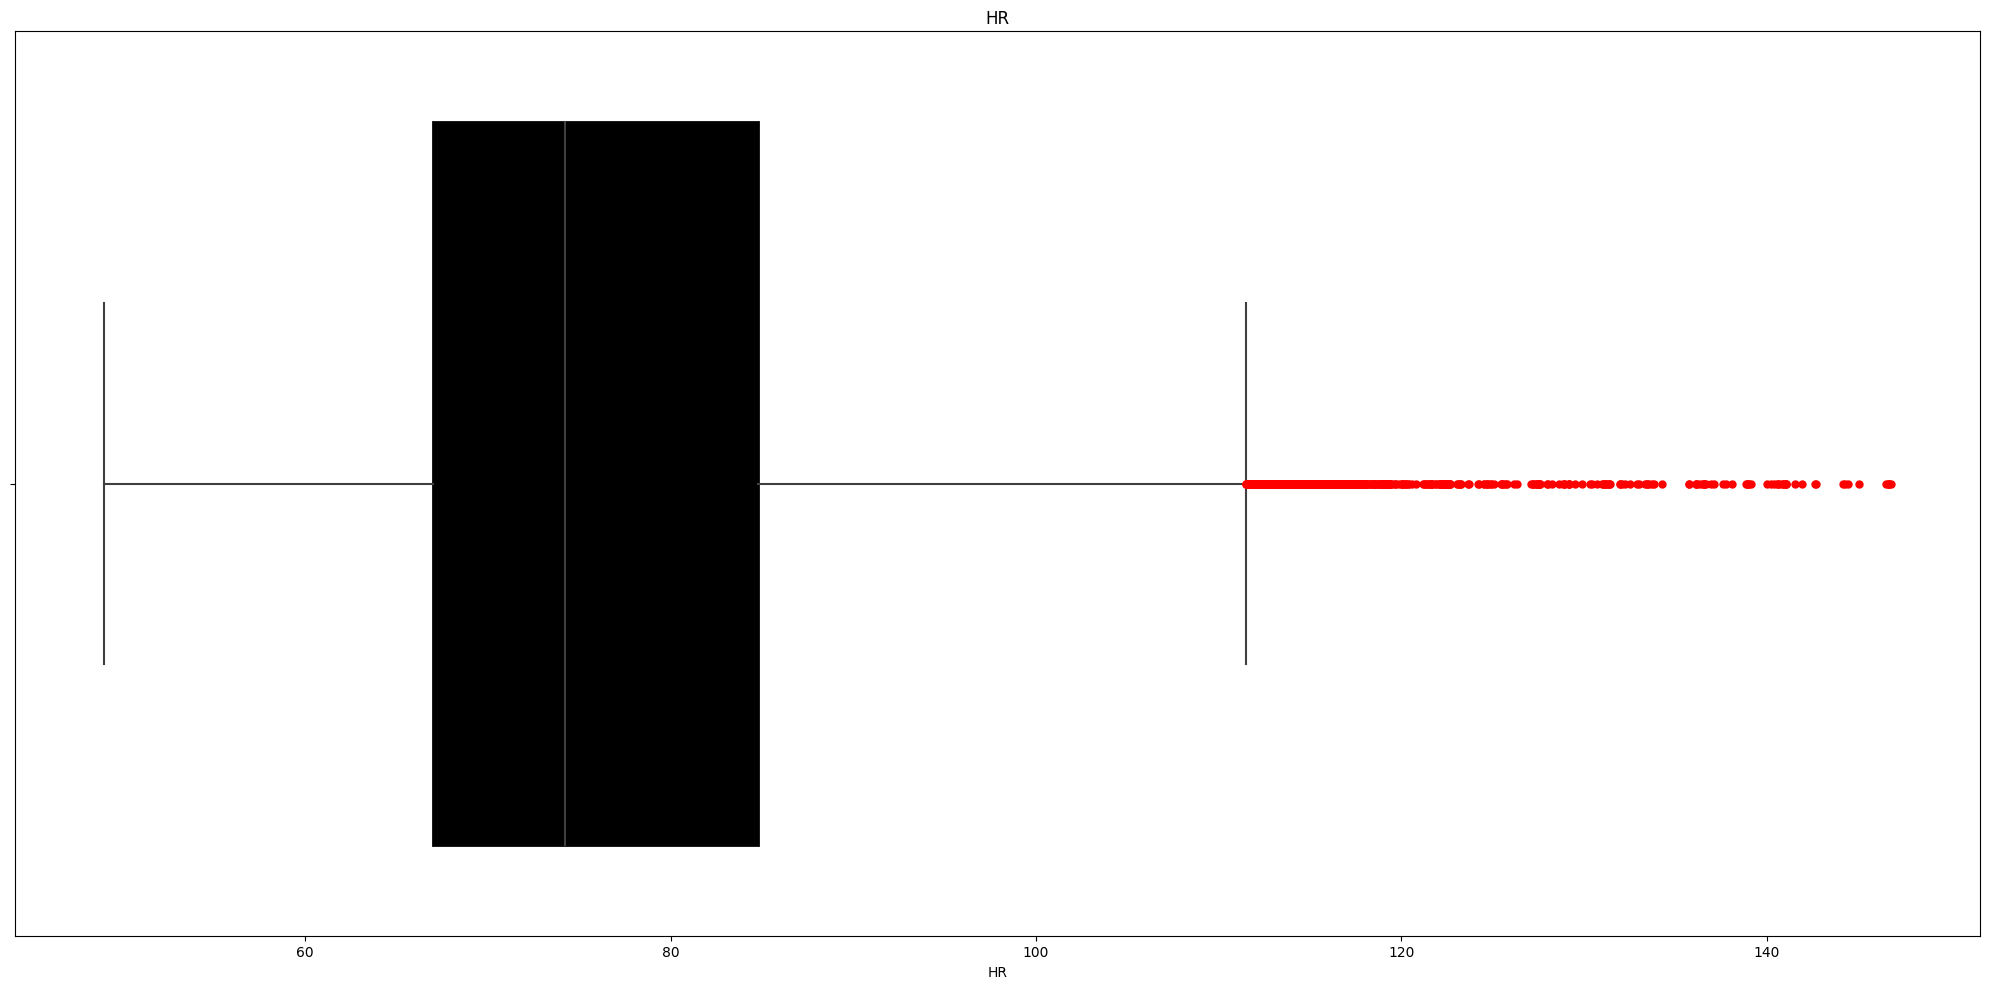

Outliers found in  HR


In [39]:
col = 'HR'

status = visualise_outlier(df_smote_enn, col)
if status:
  print('Outliers found in ', col)
else:
  print('Outliers not found in ', col, ' good to go')

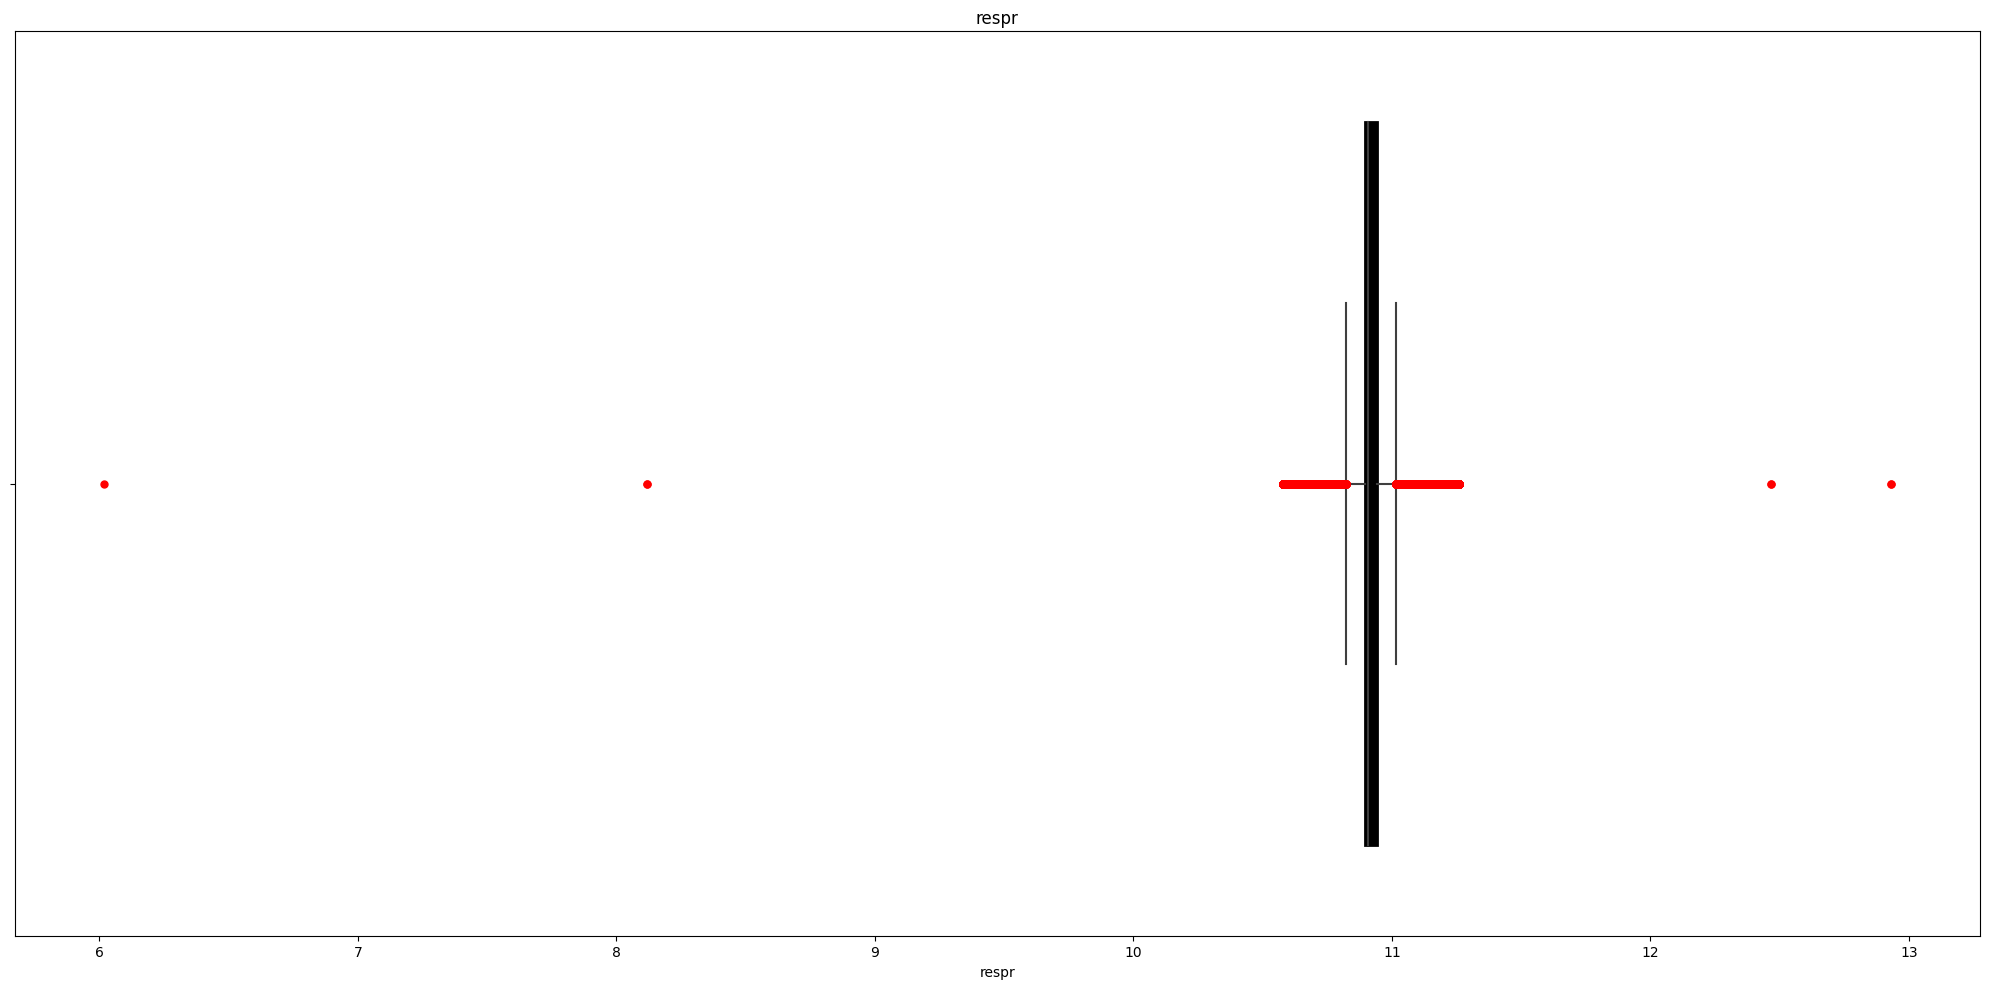

Outliers found in  respr


In [40]:
col = 'respr'

status = visualise_outlier(df_smote_enn, col)
if status:
  print('Outliers found in ', col)
else:
  print('Outliers not found in ', col, ' good to go')

# **Outliers**



Outliers are data points that lie far away from the majority of the data points in a dataset. They can be caused by measurement errors, natural variations in the data, or anomalies. Outliers can significantly affect the results of statistical analyses, such as mean, standard deviation, and regression models, and can lead to incorrect conclusions.

handle outliers:

01. Identify the cause: Before handling outliers, it's essential to identify the cause of the outliers. Outliers could be genuine data points, so it's crucial to understand the source of the outlier before deciding how to handle it.

02. Remove the outlier: One approach to handling outliers is to remove them from the dataset. However, this approach should only be used if the outliers are the result of measurement errors or anomalies. If the outliers are a natural part of the data, removing them can lead to incorrect conclusions.

03. Winsorize the data: Winsorization is a statistical technique used to handle outliers by replacing them with the nearest values that are within a certain percentile range. For example, if the 95th percentile is chosen, the data points above and below the 95th percentile are replaced with the values at the 95th percentile.

04. Transform the data: Transforming the data can help to normalize the data and reduce the impact of outliers. For example, taking the log or square root of the data can help to reduce the impact of extreme values.

05. Use robust statistical methods: Robust statistical methods are less sensitive to outliers and can provide more accurate results than traditional statistical methods. For example, instead of calculating the mean, use the median, or use robust regression methods like the Theil-Sen estimator or M-estimators.



In [52]:
df_smote_enn.dtypes

id          float64
X           float64
Y           float64
Z           float64
datetime    float64
EDA         float64
TEMP        float64
HR          float64
respr       float64
y           float64
dtype: object

In [57]:
df_smote_enn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47401 entries, 0 to 47400
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        47401 non-null  float64
 1   X         47401 non-null  float64
 2   Y         47401 non-null  float64
 3   Z         47401 non-null  float64
 4   datetime  47401 non-null  float64
 5   EDA       47401 non-null  float64
 6   TEMP      47401 non-null  float64
 7   HR        47401 non-null  float64
 8   respr     47401 non-null  float64
 9   y         47401 non-null  float64
dtypes: float64(10)
memory usage: 3.6 MB


In [59]:
# Winsorize the data
# Replace the outliers in a pandas DataFrame with the nearest values that are within the 5th and 95th percentiles

# Make a copy of the DataFrame to preserve the original data
win_df_smote_enn = df_smote_enn.copy()

# Define the columns that you want to winsorize
""" the id and datetime columns are typically not subject to outlier removal, 
    because they represent unique identifiers and timestamps, respectively, 
    and not numerical data that can contain outliers. """

# We skip winsorizing the id and datetime columns as they are unique identifiers and timestamps, respectively
columns_to_winsorize = ['X',	'Y',	'Z',	'EDA',	'TEMP',	'HR',	'respr']

# Winsorize the specified columns in the DataFrame
win_values = winsorize(win_df_smote_enn[columns_to_winsorize].values, limits=[0.25, 0.25])

# Replace the original columns with the winsorized values
win_df_smote_enn[columns_to_winsorize] = win_values

# Compare the original and winsorized values
for column in columns_to_winsorize:
    outliers_removed = np.sum(df_smote_enn[column] != win_df_smote_enn[column])
    print(f'Outliers removed from {column}: {outliers_removed}')



Outliers removed from X: 36805
Outliers removed from Y: 22958
Outliers removed from Z: 36013
Outliers removed from EDA: 22725
Outliers removed from TEMP: 0
Outliers removed from HR: 47401
Outliers removed from respr: 0


In [60]:
win_df_smote_enn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47401 entries, 0 to 47400
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        47401 non-null  float64
 1   X         47401 non-null  float64
 2   Y         47401 non-null  float64
 3   Z         47401 non-null  float64
 4   datetime  47401 non-null  float64
 5   EDA       47401 non-null  float64
 6   TEMP      47401 non-null  float64
 7   HR        47401 non-null  float64
 8   respr     47401 non-null  float64
 9   y         47401 non-null  float64
dtypes: float64(10)
memory usage: 3.6 MB


# Standardization and normalization

Standardization and normalization are two common methods used to preprocess numerical data for machine learning models.

Standardization scales the data so that it has a mean of 0 and standard deviation of 1. This means that the values will be centered around 0 and the range of the data will be equal to the standard deviation. Standardization is useful when the distribution of the data is approximately normal, which is often a requirement for some machine learning algorithms.

Normalization scales the data to be between 0 and 1. This can be useful when the range of values in the dataset varies widely or there are outliers. Normalization can help to equalize the importance of different features, ensuring that each feature contributes equally to the analysis.

In [66]:
# Make a copy of the DataFrame to preserve the original data
data = win_df_smote_enn.copy()

# select the numeric variables to be normalized
num_vars = ['X', 'Y', 'Z', 'EDA', 'TEMP', 'HR', 'respr']

# create a MinMaxScaler object and fit it to the data
scaler = MinMaxScaler()
scaler.fit(data[num_vars])

# transform the selected variables using the fitted scaler
data[num_vars] = scaler.transform(data[num_vars])

In [69]:
# Saving preprocessed  data into csv
data.to_csv('save/preprocessed_data.csv', index=False)

In [70]:
# copy created csv files into google drive asap
connect_with_google_drive('save', 'preprocessed_data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data has been copy to google drive


# Step 06 - use machine learning methods to find out best signals for prediction stress level



1.   Feature selection: Start by selecting a subset of the most relevant features (or variables) that have a significant impact on the target variable. You can use various feature selection techniques such as Univariate Selection, Recursive Feature Elimination, or Principal Component Analysis.
2.   Correlation analysis: Identify the correlation between different variables and the target variable. Choose variables that have a high correlation coefficient with the target variable. You can use correlation matrices or scatter plots to visualize the correlations.
3.   Principal Component Analysis (PCA): PCA is a technique that can be used to reduce the number of features in a dataset while retaining most of the information. PCA works by transforming the original features into a new set of features that are uncorrelated and explain the maximum amount of variance in the data.
4.   Recursive Feature Elimination (RFE): RFE is a popular feature selection technique that works by recursively removing the least important feature(s) from the dataset until the desired number of features is reached. The performance of the model is measured after each feature is removed to identify the best set of features.
5.   Regularization: Use regularization techniques such as L1 (Lasso) and L2 (Ridge) regularization to identify the most important features. These techniques assign weights to different features and reduce the importance of less significant features.
6.   Test different combinations: Test different combinations of features and use different machine learning algorithms to evaluate the performance of each combination. You can use techniques such as cross-validation to estimate the accuracy of each model.







In [71]:
# create x and y values for machine learning methods

features_x = ['X', 'Y', 'Z', 'datetime', 'EDA', 'TEMP', 'HR', 'respr']
features_y = ['y']

X = data[features_x]
y = data[features_y]

In [29]:
# univariate feature selection technique
# Transform the data to make it non-negative
X = np.log(X - np.min(X) + 1) # Add 1 to avoid taking the log of 0

# Select the k best features using chi-squared test
selector = SelectKBest(chi2, k=5)
X_new = selector.fit_transform(X, y)

# Print the indices of the selected features
selected_features = selector.get_support(indices=True)
print("Selected features:", selected_features)


Selected features: [1 2 3 4 5]


/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


According to univariate feature selection technique best three signals for prediction are :  Z, EDA, HR

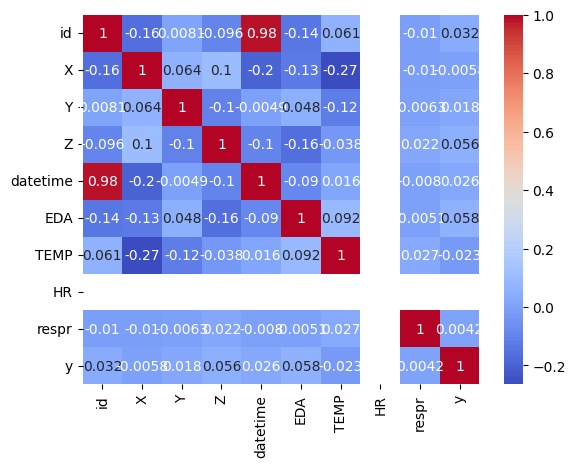

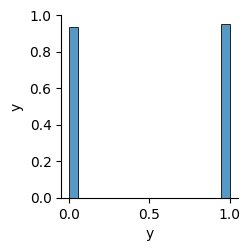

In [30]:
# calculate the correlation matrix technique
corr = data.corr()

# plot the correlation matrix as a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

# select variables with high correlation to the target variable
corr_with_target = corr['y']
high_corr_vars = corr_with_target[abs(corr_with_target) > 0.5].index.tolist()

# plot scatter plots to visualize the relationship between the selected variables and the target variable
data_selected = data[high_corr_vars]
sns.pairplot(data_selected)

According to seaborn correlation matrix technique best three signals for prediction are also :  Z, EDA, HR

# Step 07 - Try to find best machine learning model 

In [16]:
# importing libraries 
import os
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import multiprocessing
import time
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from scipy.signal import butter, filtfilt, find_peaks
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.over_sampling import ADASYN, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import resample
from sklearn.utils.class_weight import compute_class_weight
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import pickle

In [2]:
# Import the Google Drive module and mount the Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Just in case if you try to run this part later. colab may not have previous folders
# So we just check save folder is available or not
if not os.path.exists('/content/save'):
  print('You are late.. No worries just go on')
  os.makedirs('/content/save')
else:
  print('You already have save folder. go head!')

# Copy a CSV file from the Google Drive to the local file system
connect_with_google_drive('load', 'preprocessed_data.csv')

# Note: the path "/content/drive/MyDrive/" may vary depending on the location of the file on your Google Drive. 

# read data from previous steps
data = pd.read_csv('save/preprocessed_data.csv')
# create x and y values for machine learning methods

features_x = ['X', 'Y', 'Z', 'datetime', 'EDA', 'TEMP', 'HR', 'respr']
features_y = ['y']

X = data[features_x]
y = data[features_y]

Mounted at /content/drive
You are late.. No worries just go on


In [10]:
# convert y to a 1D array using ravel()
y_1d = y.to_numpy().ravel()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_1d, test_size=0.2, random_state=42)

# Define the models to test
models = [
    {'name': 'Logistic Regression', 'model': LogisticRegression()},
    {'name': 'Decision Tree', 'model': DecisionTreeClassifier()},
    {'name': 'K-Nearest Neighbors', 'model': KNeighborsClassifier()},
    {'name': 'Gaussian Naive Bayes', 'model': GaussianNB()},
    {'name': 'Support Vector Machine', 'model': SVC()},
    {'name': 'Random Forest', 'model': RandomForestClassifier()},
    {'name': 'Gradient Boosting', 'model': GradientBoostingClassifier()}
]

# Train and test each model
train_times = []
accuracies = []
for model in tqdm(models):
    start_time = time.time()
    clf = model['model']
    clf.fit(X_train, y_train)
    train_time = time.time() - start_time
    train_times.append(train_time)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"{model['name']}: accuracy = {accuracy:.3f}, train time = {train_time:.3f} seconds")

# Display a table of the results
results_df = pd.DataFrame({'Model': [model['name'] for model in models],
                           'Train Time (s)': train_times,
                           'Accuracy': accuracies})
results_df = results_df.sort_values('Accuracy', ascending=False).reset_index(drop=True)
print('\nResults:')
print(results_df)


  0%|          | 0/7 [00:00<?, ?it/s]

Logistic Regression: accuracy = 0.509, train time = 0.041 seconds
Decision Tree: accuracy = 0.953, train time = 0.225 seconds
K-Nearest Neighbors: accuracy = 0.936, train time = 0.096 seconds
Gaussian Naive Bayes: accuracy = 0.513, train time = 0.015 seconds
Support Vector Machine: accuracy = 0.509, train time = 79.292 seconds
Random Forest: accuracy = 0.961, train time = 3.403 seconds
Gradient Boosting: accuracy = 0.784, train time = 3.601 seconds

Results:
                    Model  Train Time (s)  Accuracy
0           Random Forest        3.402971  0.960869
1           Decision Tree        0.224653  0.953380
2     K-Nearest Neighbors        0.096457  0.936188
3       Gradient Boosting        3.600783  0.783989
4    Gaussian Naive Bayes        0.015311  0.513237
5     Logistic Regression        0.040999  0.509124
6  Support Vector Machine       79.291967  0.509124


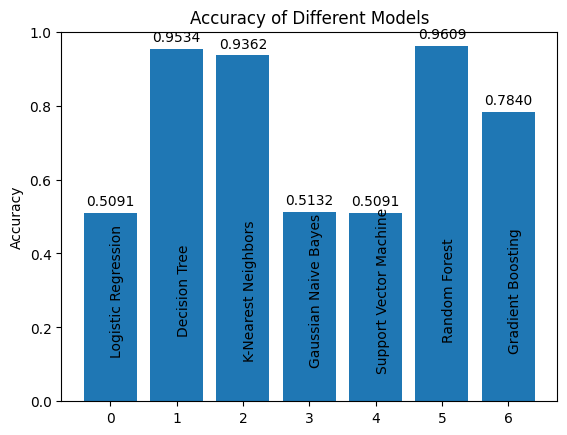

In [11]:
# Plot the results
fig, ax = plt.subplots()
bars = ax.bar(np.arange(len(models)), accuracies)
ax.set_xticks(np.arange(len(models)))
# Comment below line just because names are too long and it will looks like messy 
# ax.set_xticklabels([model['name'] for model in models])
ax.set_ylim(0, 1)
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of Different Models')
for i, acc in enumerate(accuracies):
    ax.text(i, acc+0.02, f"{acc:.4f}", ha='center')
# Add model name inside each bar
for i, bar in enumerate(bars):
    ax.text(bar.get_x() + bar.get_width() / 2., 0.3, models[i]['name'], ha='left', va='center', rotation=90)

plt.show()


In [14]:
# According to previous result Random Forest is the best ml model for this dataset
# Now just trying to increase accuracy a little 
# initialize a random forest classifier with 200 trees
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)

# fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# use the trained classifier to predict the test data
y_pred = rf_classifier.predict(X_test)

# evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("F1-Score:", f1)


conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)


# perform 10-fold cross-validation and calculate the mean accuracy and F1 score
cv_accuracy = cross_val_score(rf_classifier, X_train, y_train, cv=10, scoring='accuracy').mean()
cv_f1 = cross_val_score(rf_classifier, X_train, y_train, cv=10, scoring='f1').mean()

print("Cross-validated Accuracy:", cv_accuracy)
print("Cross-validated F1-Score:", cv_f1)


Accuracy: 0.961291003058749
F1-Score: 0.9620828597995662
[[4458  196]
 [ 171 4656]]
Cross-validated Accuracy: 0.9589135021097046
Cross-validated F1-Score: 0.9592177715208434


**Generally** you would want to see a high cross-validated accuracy and F1-score, as this indicates that the model is able to generalize well to new, unseen data. However, it's important to note that the performance of the model can vary depending on the specific train-test split used in cross-validation, and also depending on the specific metric being used to evaluate the model.

In this case, the cross-validated accuracy and F1-score are both quite high, which suggests that the random forest classifier is performing well on the dataset.

In [15]:
# The company is worried about false negatives and wants to show that the device won't miss stressful periods. 
# predict probabilities for the test data
y_prob = rf_classifier.predict_proba(X_test)

# adjust threshold to increase sensitivity to positive class
y_pred_new = (y_prob[:, 1] > 0.3).astype(int)

# evaluate the accuracy of the classifier with new predictions
accuracy_new = accuracy_score(y_test, y_pred_new)
f1_new = f1_score(y_test, y_pred_new)
print("New Accuracy:", accuracy_new)
print("New F1-Score:", f1_new)

# print confusion matrix for new predictions
conf_mat_new = confusion_matrix(y_test, y_pred_new)
print(conf_mat_new)

New Accuracy: 0.9530640227824069
New F1-Score: 0.9556817050094611
[[4238  416]
 [  29 4798]]


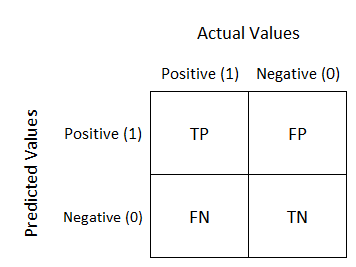

In [17]:
# save the trained classifier to a file
with open('save/rf_classifier.pkl', 'wb') as f:
    pickle.dump(rf_classifier, f)

connect_with_google_drive('save', 'rf_classifier.pkl')
print('Classifier has been copy to google drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Classifier has been copy to google drive


# Step 08 - Try to find best best deep learning  model 

01. Convolutional Neural Network (CNN): CNN is a popular deep learning model used for image classification, but it can also be used for time-series data. In this case, the data can be treated as an image where each feature is a pixel, and the CNN can learn to extract features that are relevant for classification.

02. Recurrent Neural Network (RNN): RNN is a deep learning model that is well-suited for time-series data. It can learn to capture the temporal dependencies in the data and make predictions based on the history of the sequence. Long Short-Term Memory (LSTM) and Gated Recurrent Unit (GRU) are popular variants of RNN that can handle long-term dependencies.

03. Autoencoder: Autoencoder is a deep learning model that can learn a compressed representation of the input data. It consists of an encoder that maps the input to a lower-dimensional space and a decoder that reconstructs the input from the lower-dimensional representation. The compressed representation can then be used for classification.

04. Generative Adversarial Network (GAN): GAN is a deep learning model that can generate new samples that are similar to the input data. It consists of a generator that generates new samples and a discriminator that tries to distinguish between the generated samples and the real samples. The generator can be trained to generate samples that are similar to the real samples, and the discriminator can be used for classification.

05. Transformer: Transformer is a deep learning model that is well-suited for sequence-to-sequence tasks such as machine translation. It can also be used for time-series data by treating the data as a sequence. Transformer can learn to attend to different parts of the sequence and capture long-term dependencies.

06. Graph Neural Network (GNN): GNN is a deep learning model that is well-suited for data that can be represented as a graph. In this case, the features can be treated as nodes in a graph, and the relationships between the features can be represented as edges. GNN can learn to propagate information through the graph and make predictions based on the graph structure.

07. Capsule Network: Capsule Network is a deep learning model that can learn to represent objects in an image in a hierarchical manner. It can be used for time-series data by treating the features as objects and learning to represent them in a hierarchical manner.

In [4]:
# importing libraries (Just in case colab reconnect)
import os
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import multiprocessing
import time
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from scipy.signal import butter, filtfilt, find_peaks
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.over_sampling import ADASYN, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import resample
from sklearn.utils.class_weight import compute_class_weight
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import pickle

In [12]:
# Import the Google Drive module and mount the Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Just in case if you try to run this part later. colab may not have previous folders
# So we just check save folder is available or not
if not os.path.exists('/content/save'):
  print('You are late.. No worries just go on')
  os.makedirs('/content/save')
else:
  print('You already have save folder. go head!')

# Copy a CSV file from the Google Drive to the local file system
connect_with_google_drive('load', 'preprocessed_data.csv')

# Note: the path "/content/drive/MyDrive/" may vary depending on the location of the file on your Google Drive. 

# read data from previous steps
data = pd.read_csv('save/preprocessed_data.csv')
# create x and y values for machine learning methods

features_x = ['X', 'Y', 'Z', 'datetime', 'EDA', 'TEMP', 'HR', 'respr']
features_y = ['y']

X = data[features_x]
y = data[features_y]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
You already have save folder. go head!


In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

Epoch 1/20
1185/1185 [==============================] - 5s 3ms/step - loss: 2354006.2500 - accuracy: 0.4969 - val_loss: 0.6931 - val_accuracy: 0.5091
Epoch 2/20
1185/1185 [==============================] - 3s 2ms/step - loss: 14899.2393 - accuracy: 0.4974 - val_loss: 0.6930 - val_accuracy: 0.5091
Epoch 3/20
1185/1185 [==============================] - 3s 3ms/step - loss: 5621.2056 - accuracy: 0.5011 - val_loss: 0.6931 - val_accuracy: 0.5091
Epoch 4/20
1185/1185 [==============================] - 3s 2ms/step - loss: 1891.8958 - accuracy: 0.5023 - val_loss: 0.6931 - val_accuracy: 0.5091
Epoch 5/20
1185/1185 [==============================] - 4s 3ms/step - loss: 2374.3130 - accuracy: 0.4992 - val_loss: 0.6931 - val_accuracy: 0.5091
Epoch 6/20
1185/1185 [==============================] - 3s 3ms/step - loss: 554.1022 - accuracy: 0.5016 - val_loss: 0.6931 - val_accuracy: 0.5091
Epoch 7/20
1185/1185 [==============================] - 3s 2ms/step - loss: 505.5188 - accuracy: 0.5006 - val_loss:

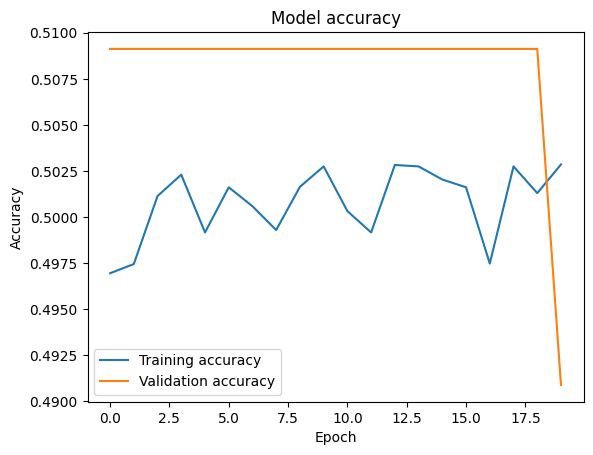

In [33]:
# 01. Convolutional Neural Network (CNN)
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(8,)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

# Plot the training history
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Epoch 1/20
1067/1067 [==============================] - 23s 8ms/step - loss: 0.6938 - accuracy: 0.5005 - val_loss: 0.6927 - val_accuracy: 0.5235
Epoch 2/20
1067/1067 [==============================] - 6s 6ms/step - loss: 0.6931 - accuracy: 0.5093 - val_loss: 0.6924 - val_accuracy: 0.5198
Epoch 3/20
1067/1067 [==============================] - 9s 8ms/step - loss: 0.6934 - accuracy: 0.5040 - val_loss: 0.6930 - val_accuracy: 0.5095
Epoch 4/20
1067/1067 [==============================] - 7s 6ms/step - loss: 0.6931 - accuracy: 0.5075 - val_loss: 0.6926 - val_accuracy: 0.5148
Epoch 5/20
1067/1067 [==============================] - 8s 8ms/step - loss: 0.6925 - accuracy: 0.5171 - val_loss: 0.6928 - val_accuracy: 0.5108
Epoch 6/20
1067/1067 [==============================] - 6s 6ms/step - loss: 0.6921 - accuracy: 0.5178 - val_loss: 0.6921 - val_accuracy: 0.5158
Epoch 7/20
1067/1067 [==============================] - 8s 8ms/step - loss: 0.6915 - accuracy: 0.5185 - val_loss: 0.6969 - val_accuracy

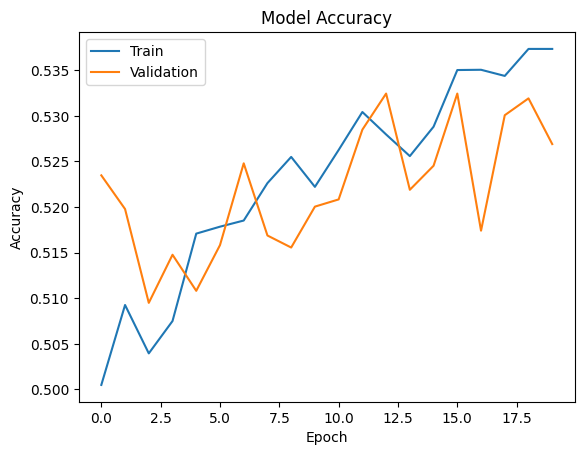

297/297 [==============================] - 1s 3ms/step - loss: 0.6810 - accuracy: 0.5409
Test Loss: 0.681, Test Accuracy: 0.541


In [49]:
# 02. Recurrent Neural Network (RNN)
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Reshape the data for LSTM model
X_train_rnn = X_train.to_numpy().reshape((X_train.to_numpy().shape[0], X_train.to_numpy().shape[1], 1))
X_test_rnn = X_test.to_numpy().reshape((X_test.to_numpy().shape[0], X_test.to_numpy().shape[1], 1))
X_val_rnn = X_val.to_numpy().reshape((X_val.to_numpy().shape[0], X_val.to_numpy().shape[1], 1))

# Define the model
model = Sequential()
model.add(LSTM(units=64, input_shape=(X_train_rnn.shape[1], 1)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_rnn, y_train, epochs=20, batch_size=32, validation_data=(X_val_rnn, y_val))

# Plot the accuracy chart
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

loss, accuracy = model.evaluate(X_test_rnn, y_test)
print(f"Test Loss: {loss:.3f}, Test Accuracy: {accuracy:.3f}")



Epoch 1/10
1067/1067 [==============================] - 2s 2ms/step - loss: -5426269103469887488.0000
Epoch 2/10
1067/1067 [==============================] - 2s 2ms/step - loss: -37287812599558176768.0000
Epoch 3/10
1067/1067 [==============================] - 4s 3ms/step - loss: -94079492528327884800.0000
Epoch 4/10
1067/1067 [==============================] - 2s 2ms/step - loss: -170497820050759614464.0000
Epoch 5/10
1067/1067 [==============================] - 2s 2ms/step - loss: -264201332378946240512.0000
Epoch 6/10
1067/1067 [==============================] - 2s 2ms/step - loss: -374085205044926349312.0000
Epoch 7/10
1067/1067 [==============================] - 2s 2ms/step - loss: -499601406269044293632.0000
Epoch 8/10
1067/1067 [==============================] - 2s 2ms/step - loss: -640452962358684286976.0000
Epoch 9/10
1067/1067 [==============================] - 2s 2ms/step - loss: -796455472019728760832.0000
Epoch 10/10
1067/1067 [==============================] - 2s 2ms/step

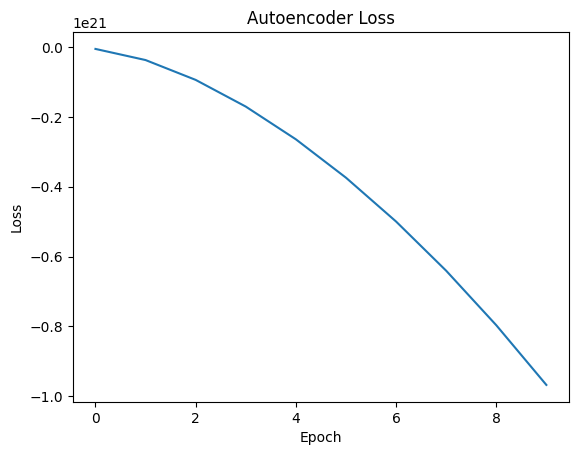

1067/1067 [==============================] - 1s 1ms/step
Epoch 1/10
1067/1067 [==============================] - 3s 2ms/step - loss: 0.6936 - accuracy: 0.5021
Epoch 2/10
1067/1067 [==============================] - 3s 2ms/step - loss: 0.6935 - accuracy: 0.5021
Epoch 3/10
1067/1067 [==============================] - 2s 2ms/step - loss: 0.6936 - accuracy: 0.5004
Epoch 4/10
1067/1067 [==============================] - 2s 2ms/step - loss: 0.6934 - accuracy: 0.5045
Epoch 5/10
1067/1067 [==============================] - 2s 2ms/step - loss: 0.6934 - accuracy: 0.5006
Epoch 6/10
1067/1067 [==============================] - 2s 2ms/step - loss: 0.6935 - accuracy: 0.4971
Epoch 7/10
1067/1067 [==============================] - 2s 2ms/step - loss: 0.6934 - accuracy: 0.4977
Epoch 8/10
1067/1067 [==============================] - 2s 2ms/step - loss: 0.6934 - accuracy: 0.5022
Epoch 9/10
1067/1067 [==============================] - 2s 2ms/step - loss: 0.6933 - accuracy: 0.5021
Epoch 10/10
1067/1067 [==

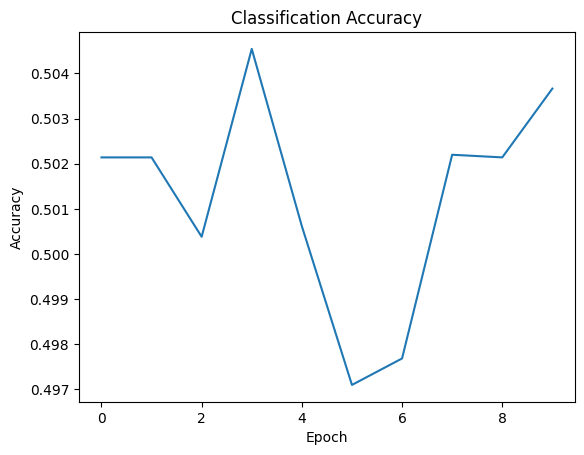

1067/1067 [==============================] - 2s 2ms/step - loss: 0.6933 - accuracy: 0.5035
Test Loss: 0.693, Test Accuracy: 0.503


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.layers import Input, Dense

X_autoencoder = np.array(X_train) # Convert X_train to numpy array
y_autoencoder = np.array(y_train) # Convert y_train to numpy array

# Define the autoencoder model
input_layer = Input(shape=(len(X_autoencoder[0]),))
encoded_layer = Dense(64, activation='relu')(input_layer)
decoded_layer = Dense(len(X_autoencoder[0]), activation='sigmoid')(encoded_layer)

autoencoder = Model(input_layer, decoded_layer)

# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder model
history = autoencoder.fit(X_autoencoder, X_autoencoder, epochs=10, batch_size=32)

# Plot the loss during training
plt.plot(history.history['loss'])
plt.title('Autoencoder Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

encoded_X = autoencoder.predict(X_autoencoder)

# Use the encoded representation for classification
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(8,)))
model.add(Dense(1, activation='sigmoid'))

# Compile the classification model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the classification model
history = model.fit(encoded_X, y_autoencoder, epochs=10, batch_size=32)

# Plot the accuracy during training
plt.plot(history.history['accuracy'])
plt.title('Classification Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

loss, accuracy = model.evaluate(encoded_X, y_autoencoder)
print(f"Test Loss: {loss:.3f}, Test Accuracy: {accuracy:.3f}")


214/214 [==============================] - 0s 1ms/step
Epoch: 1, Generator Loss: 0.6787078380584717, Discriminator Loss: 33266760.0
214/214 [==============================] - 0s 2ms/step
Epoch: 2, Generator Loss: 0.6778620481491089, Discriminator Loss: 33413790.0
214/214 [==============================] - 0s 2ms/step
Epoch: 3, Generator Loss: 0.6769678592681885, Discriminator Loss: 35071888.0
214/214 [==============================] - 0s 1ms/step
Epoch: 4, Generator Loss: 0.673065185546875, Discriminator Loss: 29507304.0
214/214 [==============================] - 0s 1ms/step
Epoch: 5, Generator Loss: 0.6734753847122192, Discriminator Loss: 30491444.0
214/214 [==============================] - 0s 1ms/step
Epoch: 6, Generator Loss: 0.6711446046829224, Discriminator Loss: 24945776.0
214/214 [==============================] - 0s 2ms/step
Epoch: 7, Generator Loss: 0.6680747270584106, Discriminator Loss: 28387830.0
214/214 [==============================] - 1s 2ms/step
Epoch: 8, Generator Lo

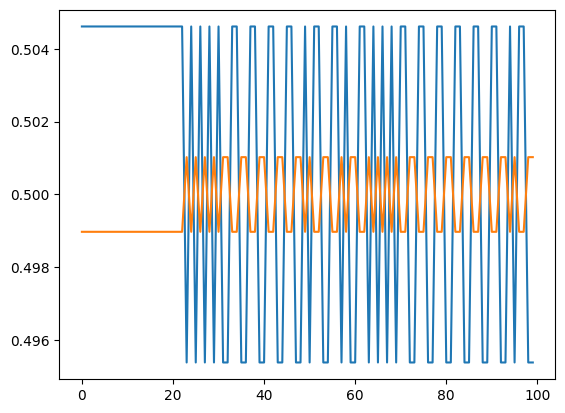

In [21]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Reshape, Flatten
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# Convert X_train and y_train to numpy arrays
X_gan = np.array(X_train)
y_gan = np.array(y_train)

# Define the generator model
generator = Sequential()
generator.add(Dense(128, input_shape=(100,), activation='relu'))
generator.add(Dense(len(X_gan[0]), activation='sigmoid'))

# Define the discriminator model
discriminator = Sequential()
discriminator.add(Dense(128, input_shape=(len(X_gan[0]),), activation='relu'))
discriminator.add(Dense(1, activation='sigmoid'))

# Combine the generator and discriminator into a GAN
gan = Sequential()
gan.add(generator)
gan.add(discriminator)

# Compile the GAN
optimizer = Adam(lr=0.0002, beta_1=0.5)
discriminator.compile(optimizer=optimizer, loss='binary_crossentropy')
gan.compile(optimizer=optimizer, loss='binary_crossentropy')

# Split the data into training and testing sets
X_train_gan, X_test_gan, y_train_gan, y_test_gan = train_test_split(X_gan, y_gan, test_size=0.2, random_state=42)

# Define the batch size and number of epochs
batch_size = 128
epochs = 100

# Define arrays to store the training and testing accuracy
train_acc = []
test_acc = []

# Train the GAN
for epoch in range(epochs):
    # Train the discriminator
    discriminator.trainable = True
    idx = np.random.randint(0, X_train_gan.shape[0], batch_size)
    X_real = X_train_gan[idx]
    y_real = y_train_gan[idx]
    noise = np.random.randn(batch_size, 100)
    X_fake = generator.predict(noise)
    X = np.concatenate((X_real, X_fake))
    y = np.concatenate((y_real.reshape(-1, 1), np.zeros((batch_size, 1))))
    discriminator_loss = discriminator.train_on_batch(X, y)

    # Train the generator
    discriminator.trainable = False
    noise = np.random.randn(batch_size, 100)
    y = np.ones((batch_size, 1))
    generator_loss = gan.train_on_batch(noise, y)

    # Calculate and store the training and testing accuracy for each epoch
    train_pred = discriminator.predict(X_train_gan)
    train_acc.append(np.mean(train_pred == y_train_gan.reshape(-1, 1)))
    test_pred = discriminator.predict(X_test_gan)
    test_acc.append(np.mean(test_pred == y_test_gan.reshape(-1, 1)))

    # Print the epoch number, generator loss, and discriminator loss
    print(f"Epoch: {epoch+1}, Generator Loss: {generator_loss}, Discriminator Loss: {discriminator_loss}")

# Plot the training and testing accuracy
plt.plot(train_acc, label='Train')
plt.plot(test_acc, label='Test')


4/4 [==============================] - 0s 4ms/step


214/214 [==============================] - 0s 1ms/step
Epoch: 1, Generator Loss: 0.7662993669509888, Discriminator Loss: 16914440.0, Train Acc: 0.5046150465167387, Test Acc: 0.49897450922941694
214/214 [==============================] - 0s 2ms/step
Epoch: 2, Generator Loss: 0.7659366726875305, Discriminator Loss: 15319302.0, Train Acc: 0.5046150465167387, Test Acc: 0.49897450922941694
214/214 [==============================] - 0s 1ms/step
Epoch: 3, Generator Loss: 0.7605679631233215, Discriminator Loss: 14336098.0, Train Acc: 0.5046150465167387, Test Acc: 0.49897450922941694
214/214 [==============================] - 0s 1ms/step
Epoch: 4, Generator Loss: 0.760185718536377, Discriminator Loss: 11097228.0, Train Acc: 0.5046150465167387, Test Acc: 0.49897450922941694
214/214 [==============================] - 0s 1ms/step
Epoch: 5, Generator Loss: 0.7605999708175659, Discriminator Loss: 11750018.0, Train Acc: 0.5046150465167387, Test Acc: 0.49897450922941694
214/214 [======================

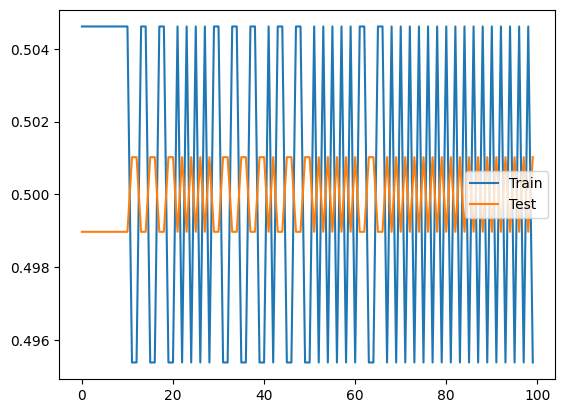

In [24]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Reshape, Flatten
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# Convert X_train and y_train to numpy arrays
X_gan = np.array(X_train)
y_gan = np.array(y_train)

# Define the generator model
generator = Sequential()
generator.add(Dense(128, input_shape=(100,), activation='relu'))
generator.add(Dense(len(X_gan[0]), activation='sigmoid'))

# Define the discriminator model
discriminator = Sequential()
discriminator.add(Dense(128, input_shape=(len(X_gan[0]),), activation='relu'))
discriminator.add(Dense(1, activation='sigmoid'))

# Combine the generator and discriminator into a GAN
gan = Sequential()
gan.add(generator)
gan.add(discriminator)

# Compile the GAN
optimizer = Adam(lr=0.0002, beta_1=0.5)
discriminator.compile(optimizer=optimizer, loss='binary_crossentropy')
gan.compile(optimizer=optimizer, loss='binary_crossentropy')

# Split the data into training and testing sets
X_train_gan, X_test_gan, y_train_gan, y_test_gan = train_test_split(X_gan, y_gan, test_size=0.2, random_state=42)

# Define the batch size and number of epochs
batch_size = 128
epochs = 100

# Define arrays to store the training and testing accuracy
train_acc = []
test_acc = []

# Train the GAN
for epoch in range(epochs):
    # Train the discriminator
    discriminator.trainable = True
    idx = np.random.randint(0, X_train_gan.shape[0], batch_size)
    X_real = X_train_gan[idx]
    y_real = y_train_gan[idx]
    noise = np.random.randn(batch_size, 100)
    X_fake = generator.predict(noise)
    X = np.concatenate((X_real, X_fake))
    y = np.concatenate((y_real.reshape(-1, 1), np.zeros((batch_size, 1))))
    discriminator_loss = discriminator.train_on_batch(X, y)

    # Train the generator
    discriminator.trainable = False
    noise = np.random.randn(batch_size, 100)
    y = np.ones((batch_size, 1))
    generator_loss = gan.train_on_batch(noise, y)

    # Calculate and store the training and testing accuracy for each epoch
    train_pred = discriminator.predict(X_train_gan)
    train_acc.append(np.mean(train_pred == y_train_gan.reshape(-1, 1)))
    test_pred = discriminator.predict(X_test_gan)
    test_acc.append(np.mean(test_pred == y_test_gan.reshape(-1, 1)))

    # Print the epoch number, generator loss, discriminator loss, and accuracy
    print(f"Epoch: {epoch+1}, Generator Loss: {generator_loss}, Discriminator Loss: {discriminator_loss}, Train Acc: {train_acc[-1]}, Test Acc: {test_acc[-1]}")

# Plot the training and testing accuracy
plt.plot(train_acc, label='Train')
plt.plot(test_acc, label='Test')
plt.legend()
plt.show()


# Is it possible to traditional ml model preform better than deep learning?

**Yes**, it is possible for traditional machine learning models to perform better than deep learning models in certain scenarios. There are many factors that can influence the performance of a machine learning model, such as the size and quality of the training data, the complexity of the task, the available computing resources, and the expertise of the data scientists involved.

While deep learning models have shown remarkable success in many areas, such as computer vision, natural language processing, and speech recognition, they can be more difficult to train and require more data and computing resources than traditional machine learning models. In some cases, simpler models like decision trees, random forests, or support vector machines may perform just as well or better than deep learning models, especially if the data is not very complex or if there is limited data available.

Ultimately, the choice of which machine learning model to use depends on the specific problem at hand, the available data and computing resources, and the expertise of the data scientists involved. It's important to carefully evaluate and compare different models before deciding which one to use.

# Step 09 - Time Series  

In [28]:
# Import libraries 
import pandas as pd
import os
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Import the Google Drive module and mount the Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Just in case if you try to run this part later. colab may not have previous folders
# So we just check save folder is available or not
if not os.path.exists('/content/save'):
  print('You are late.. No worries just go on')
  os.makedirs('/content/save')
else:
  print('You already have save folder. go head!')

# Copy a CSV file from the Google Drive to the local file system
connect_with_google_drive('load', 'preprocessed_data.csv')

# Note: the path "/content/drive/MyDrive/" may vary depending on the location of the file on your Google Drive. 


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
You already have save folder. go head!


In [38]:
# read data from previous steps
df = pd.read_csv('save/preprocessed_data.csv')
# we take partipant 2 
data = df[(df['id'] == 2)]

data.head()

,id,X,Y,Z,datetime,EDA,TEMP,HR,respr,y
19,2.0,0.000000,0.0,1.0,1.644231e+09,0.049185,0.909151,0.0,0.659824,0.0
28,2.0,0.475253,0.0,1.0,1.644228e+09,0.000000,0.631300,0.0,0.707661,0.0
46,2.0,0.000000,0.0,0.0,1.644228e+09,0.000000,0.970822,0.0,0.758585,0.0
56,2.0,0.000000,0.0,1.0,1.644229e+09,0.028579,0.909151,0.0,0.659824,0.0
59,2.0,0.000000,0.0,0.0,1.644228e+09,0.000000,0.996021,0.0,0.758585,0.0


In [39]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM

# create a datetime index
data['datetime'] = pd.to_datetime(data['datetime'], unit='s')
data = data.set_index('datetime')

# split data into train and test sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# define ARIMA model
model = ARIMA(train['y'], order=(1, 1, 1))

# fit ARIMA model
model_fit = model.fit()

# make predictions
predictions_arima = model_fit.predict(start=len(train), end=len(train) + len(test)-1, typ='levels')

# calculate root mean squared error for ARIMA
rmse_arima = np.sqrt(mean_squared_error(test['y'], predictions_arima))
print('ARIMA RMSE:', rmse_arima)

# define LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(1, 7)))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')

# reshape data for LSTM model
train_X, train_y = train[['X', 'Y', 'Z', 'EDA', 'TEMP', 'HR', 'respr']].values, train['y'].values
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X, test_y = test[['X', 'Y', 'Z', 'EDA', 'TEMP', 'HR', 'respr']].values, test['y'].values
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

# fit LSTM model
model_lstm.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# make predictions
predictions_lstm = model_lstm.predict(test_X)

# reshape predictions for comparison
predictions_lstm = predictions_lstm.reshape(predictions_lstm.shape[0], 1)

# calculate root mean squared error for LSTM
rmse_lstm = np.sqrt(mean_squared_error(test_y, predictions_lstm))
print('LSTM RMSE:', rmse_lstm)


<ipython-input-39-46d063fc7c4d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['datetime'] = pd.to_datetime(data['datetime'], unit='s')
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no 

ARIMA RMSE: 0.0
Epoch 1/50
21/21 - 2s - loss: 0.3348 - val_loss: 0.9185 - 2s/epoch - 85ms/step
Epoch 2/50
21/21 - 0s - loss: 0.2864 - val_loss: 0.7761 - 94ms/epoch - 4ms/step
Epoch 3/50
21/21 - 0s - loss: 0.2540 - val_loss: 0.6609 - 91ms/epoch - 4ms/step
Epoch 4/50
21/21 - 0s - loss: 0.2345 - val_loss: 0.5716 - 93ms/epoch - 4ms/step
Epoch 5/50
21/21 - 0s - loss: 0.2246 - val_loss: 0.5053 - 100ms/epoch - 5ms/step
Epoch 6/50
21/21 - 0s - loss: 0.2200 - val_loss: 0.4567 - 100ms/epoch - 5ms/step
Epoch 7/50
21/21 - 0s - loss: 0.2185 - val_loss: 0.4222 - 90ms/epoch - 4ms/step
Epoch 8/50
21/21 - 0s - loss: 0.2187 - val_loss: 0.3987 - 86ms/epoch - 4ms/step
Epoch 9/50
21/21 - 0s - loss: 0.2187 - val_loss: 0.3827 - 79ms/epoch - 4ms/step
Epoch 10/50
21/21 - 0s - loss: 0.2190 - val_loss: 0.3722 - 88ms/epoch - 4ms/step
Epoch 11/50
21/21 - 0s - loss: 0.2191 - val_loss: 0.3652 - 91ms/epoch - 4ms/step
Epoch 12/50
21/21 - 0s - loss: 0.2190 - val_loss: 0.3603 - 105ms/epoch - 5ms/step
Epoch 13/50
21/21 -

reference



*   I used code that Dr. Ana gave us ( but did not use just that code
*   https://stats.stackexchange.com/questions/163799/training-a-random-forest-in-r-with-a-fixed-maximum-false-positive-rate
*   https://stackoverflow.com/questions/47775220/how-to-plot-multiple-pandas-columns
*   https://stackoverflow.com/questions/15923826/random-row-selection-in-pandas-dataframe
*   https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger
*   https://stackoverflow.com/questions/22391433/count-the-frequency-that-a-value-occurs-in-a-dataframe-column
*   https://stackoverflow.com/questions/1557571/how-do-i-get-time-of-a-python-programs-execution
*   https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html
*   I used my previous lab codes
*   and used chatGPT for some errors and information 











